# IFR

Tasso di letalità grezzo globale da Maggio 2020.

> Max Pierini

Il tasso di letalità (IFR, _Infection Fatality Rate_) è qui stimato come rapporto tra totale dei decessi cumulativi e totale dei casi cumulativi giornalieri di COVID-19 dal 1 Maggio 2020 ad oggi, in ogni singola nazione i cui dati siano pubblicati dalla Johns Hopking University. Sono esclusi i dati precedenti al 1 Maggio 2020 essendo meno attendibili come tracciamento nuovi casi e definizione decessi in quadro di COVID-19.

È poi stimato l'IFR globale medio con intervalli di confidenza dal 10% al 90%.

In [1]:
import datetime as dt

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mdates
from matplotlib import ticker as mtick
import seaborn as sns

from IPython.display import Markdown, display, Math
import pandas as pd

import scipy.stats as sps

sns.set()

In [3]:
T = pd.read_csv(
    "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",
    index_col=["Country/Region"]
).sort_index()
D = pd.read_csv(
    "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv",
    index_col=["Country/Region"]
).sort_index()

T.drop(['Province/State', "Lat", 'Long'], 1, inplace=True)
D.drop(['Province/State', "Lat", 'Long'], 1, inplace=True)

In [4]:
_ = """T = pd.read_csv(
    "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/csv/COVID-Confirmed.csv",
    index_col=["Country/Region"]
).sort_index()
R = pd.read_csv(
    "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/csv/COVID-Recovered.csv",
    index_col=["Country/Region"]
).sort_index()
D = pd.read_csv(
    "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/csv/COVID-Deaths.csv",
    index_col=["Country/Region"]
).sort_index()"""

In [5]:
T = T.transpose()
T.index = pd.to_datetime(T.index, infer_datetime_format=True)

D = D.transpose()
D.index = pd.to_datetime(D.index, infer_datetime_format=True)

In [116]:
IFR = None

for country in countries:
    t = T[country]
    if isinstance(t, pd.DataFrame):
        t = t.sum(axis=1)
    d = D[country]
    if isinstance(d, pd.DataFrame):
        d = d.sum(axis=1)

    idx_lim = "2020-05-01"  # d.index.max() - pd.Timedelta(days=30*6)
    ifr = d[d.index>=idx_lim] / t[t.index>=idx_lim]
    ifr = pd.DataFrame(ifr)
    
    if IFR is None:
        IFR = ifr
    else:
        IFR[country] = ifr

In [117]:
IFR_melt = IFR.reset_index().melt(id_vars='index', var_name='country', value_name='IFR')

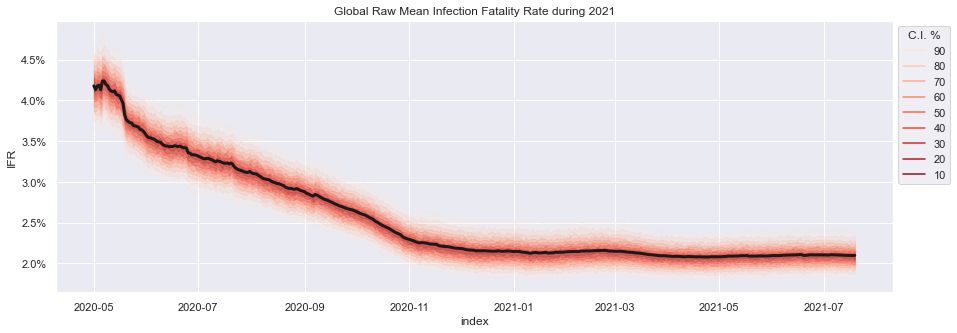

In [118]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(
    data=IFR_melt[IFR_melt.country!='Vanuatu'],
    x='index', y='IFR',
    ci=None, color='k', lw=3,
    ax=ax
)
cm = sns.color_palette("Reds", 9)
for i, ci in enumerate(np.arange(10, 91, 10)[::-1]):
    sns.lineplot(
        data=IFR_melt[IFR_melt.country!='Vanuatu'],
        x='index', y='IFR',
        ci=ci, color='r', linestyle='',
        hue = ci,palette={ci:cm[i]},
        ax=ax
    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
ax.set(
    title='Global Raw Mean Infection Fatality Rate from May 2020'
)
ax.legend(title='C.I. %', bbox_to_anchor=[1,1], loc='upper left')
plt.show()

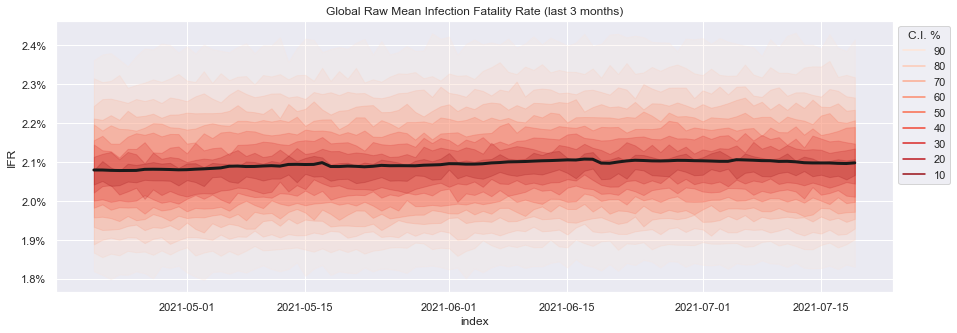

In [125]:
fig, ax = plt.subplots(figsize=(15, 5))
last_3_months = IFR_melt['index'].max() - pd.Timedelta(days=30*3)
sns.lineplot(
    data=IFR_melt[(IFR_melt.country!='Vanuatu') & (IFR_melt['index']>=last_3_months)],
    x='index', y='IFR',
    ci=None, color='k', lw=3,
    ax=ax
)
cm = sns.color_palette("Reds", 9)
for i, ci in enumerate(np.arange(10, 91, 10)[::-1]):
    sns.lineplot(
        data=IFR_melt[(IFR_melt.country!='Vanuatu') & (IFR_melt['index']>=last_3_months)],
        x='index', y='IFR',
        ci=ci, color='r', linestyle='',
        hue = ci,palette={ci:cm[i]},
        ax=ax
    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
ax.set(
    title='Global Raw Mean Infection Fatality Rate (last 3 months)'
)
ax.legend(title='C.I. %', bbox_to_anchor=[1,1], loc='upper left')
plt.show()

# Singole nazioni

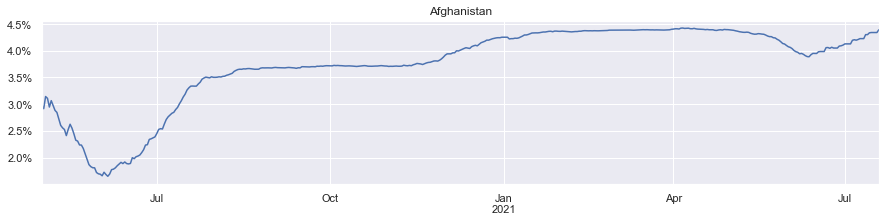

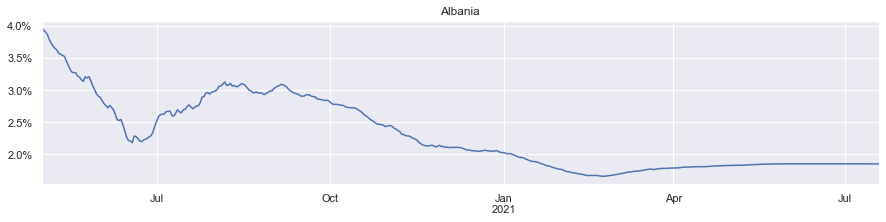

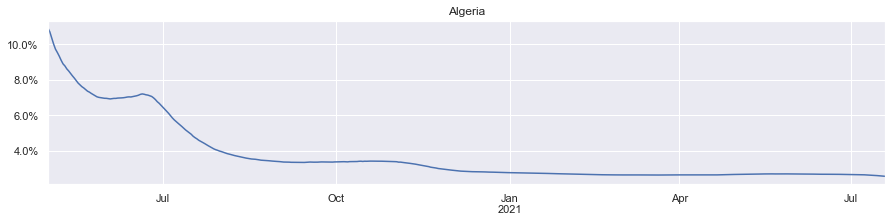

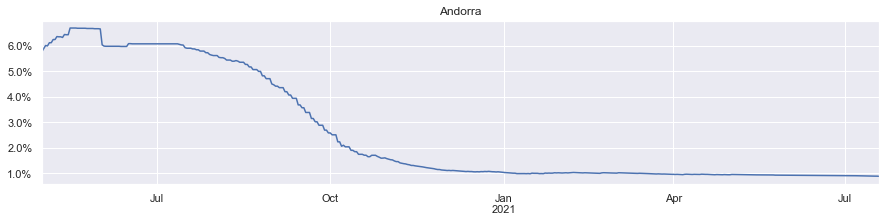

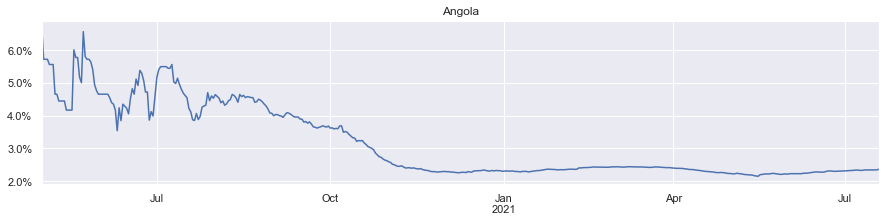

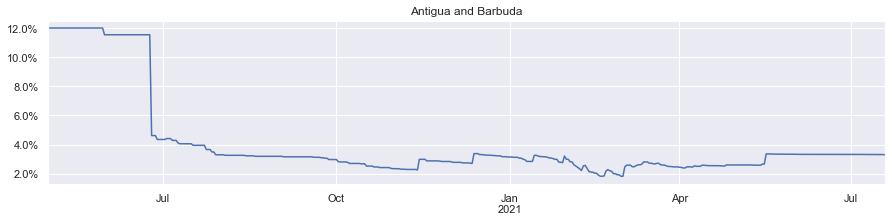

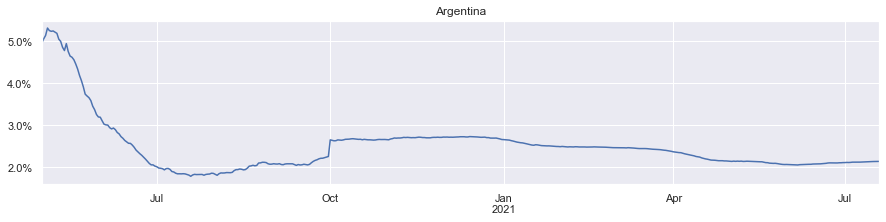

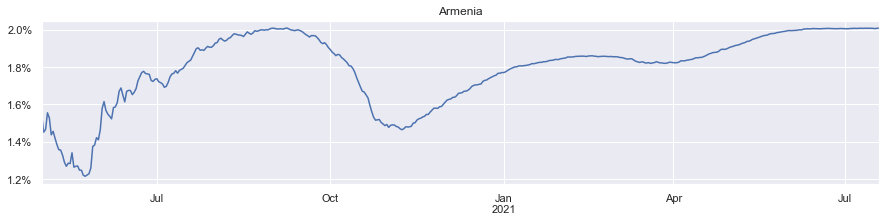

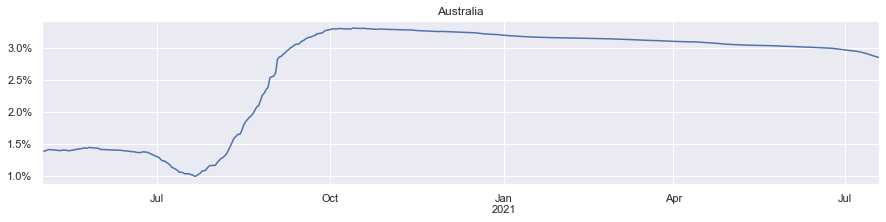

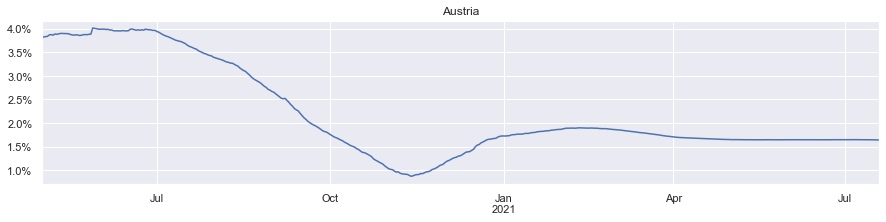

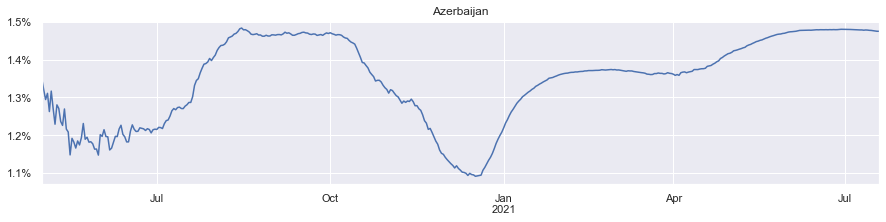

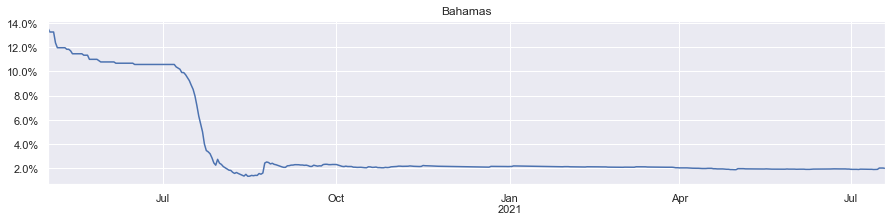

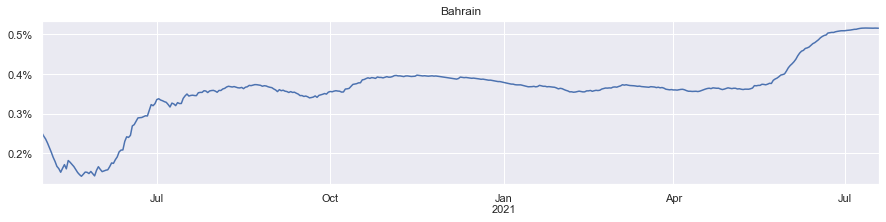

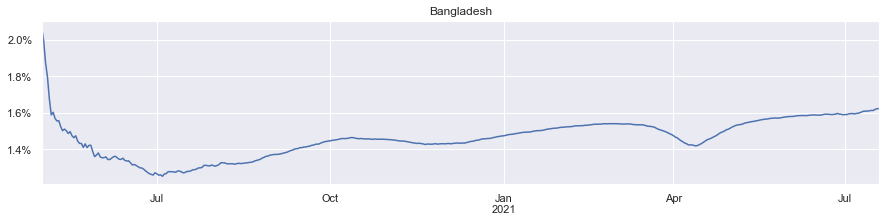

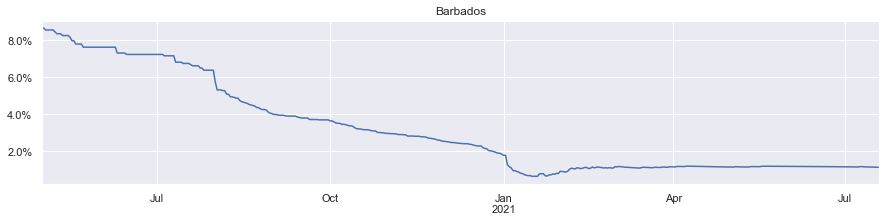

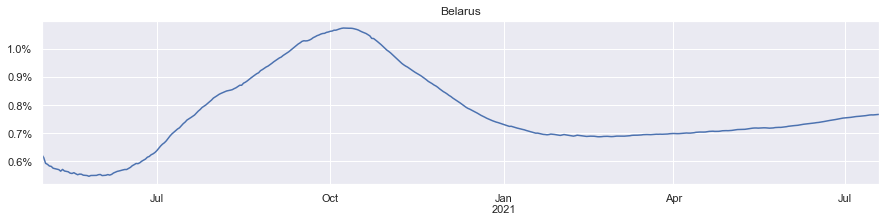

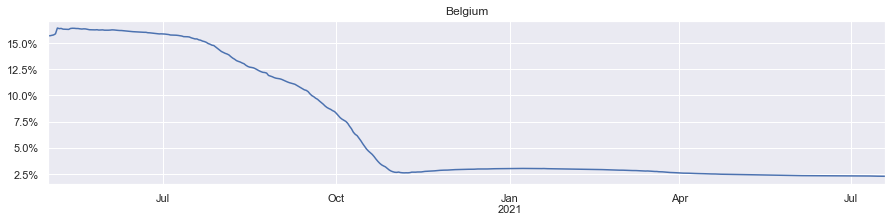

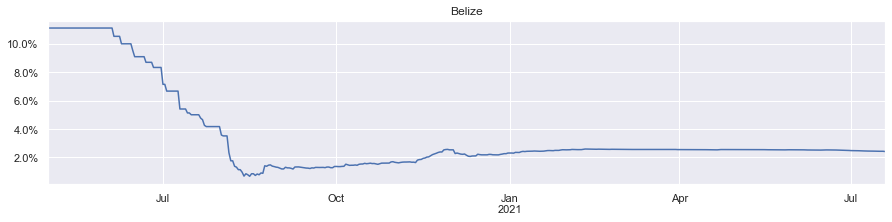

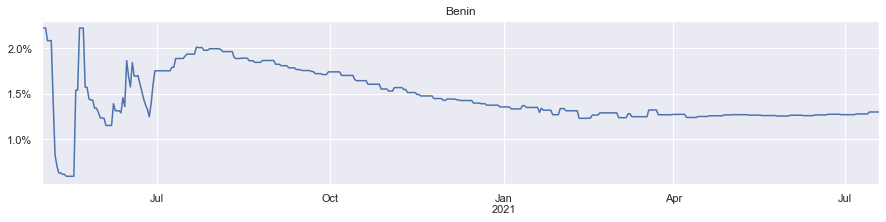

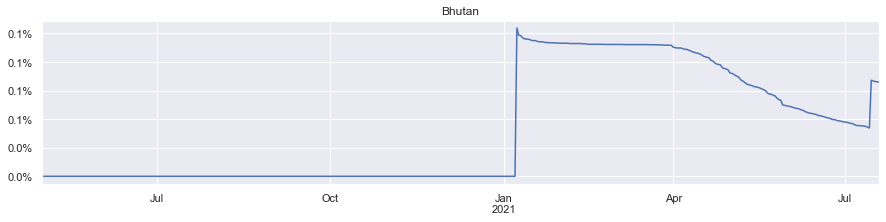

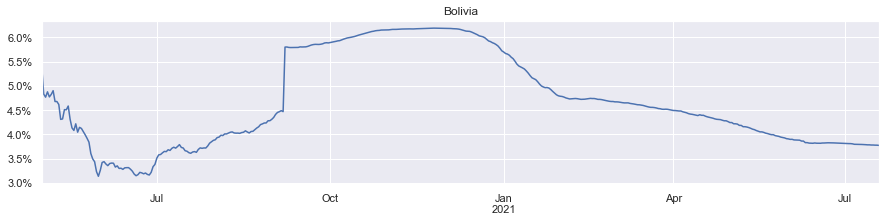

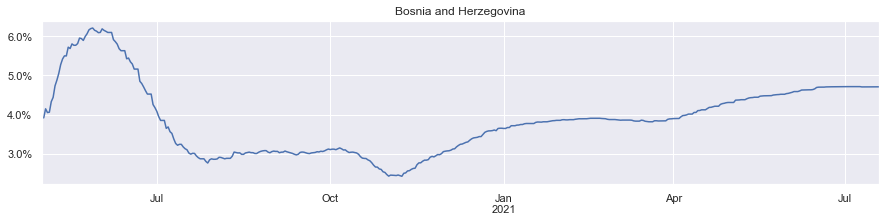

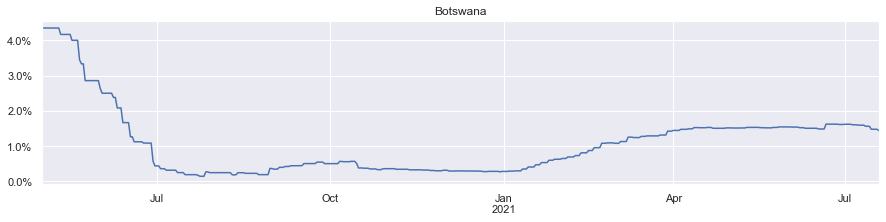

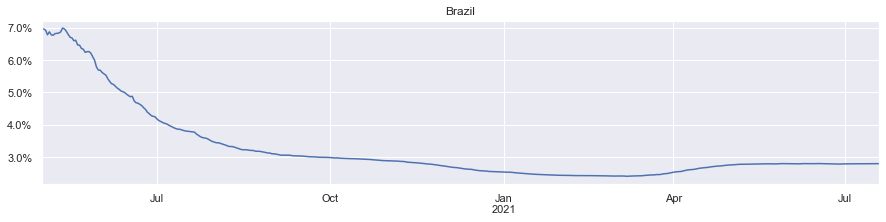

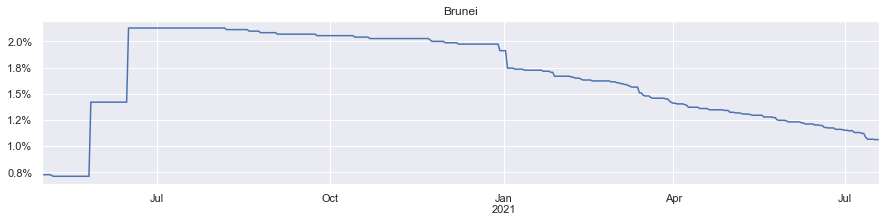

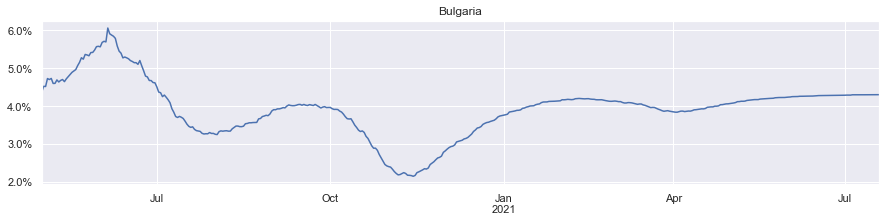

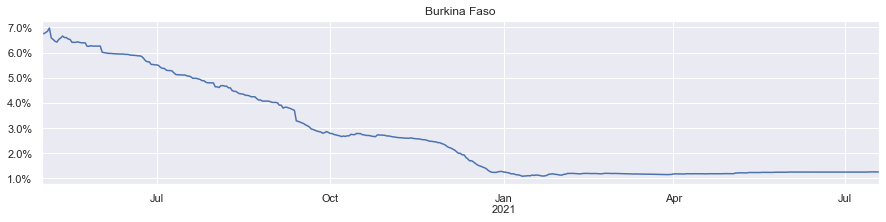

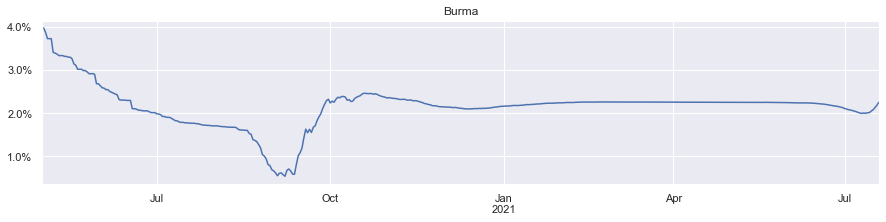

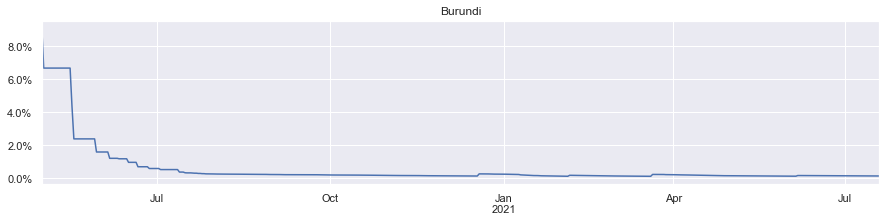

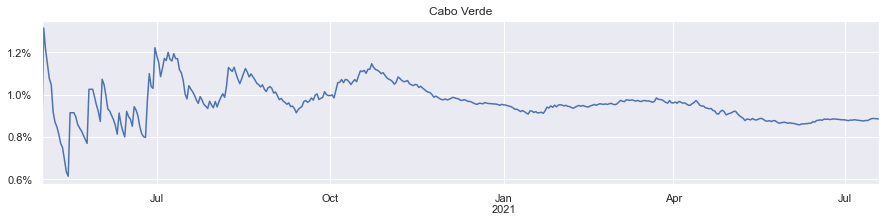

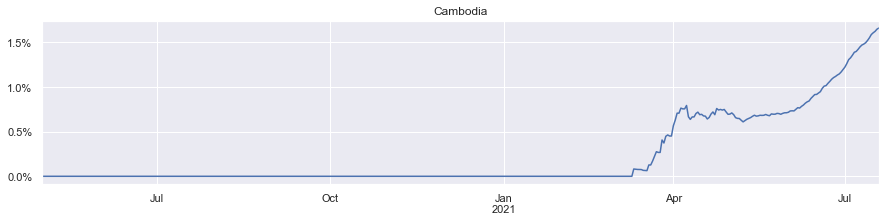

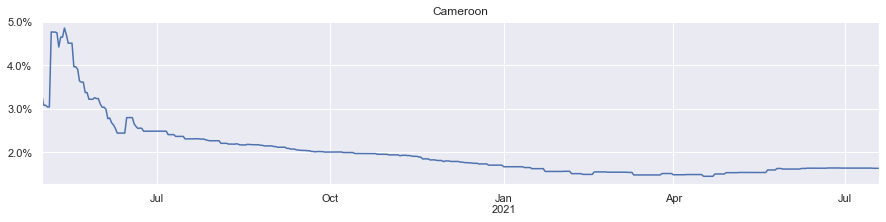

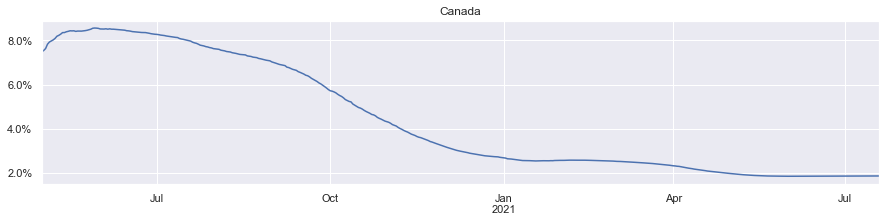

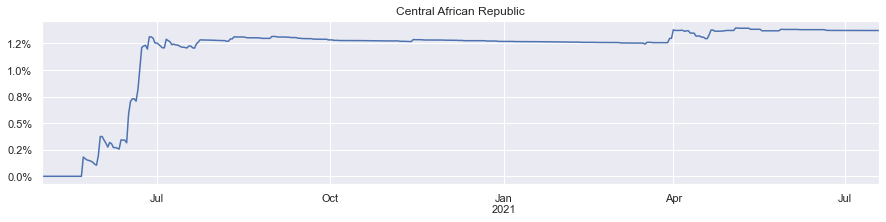

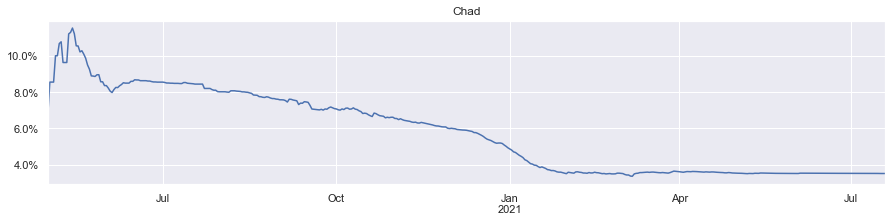

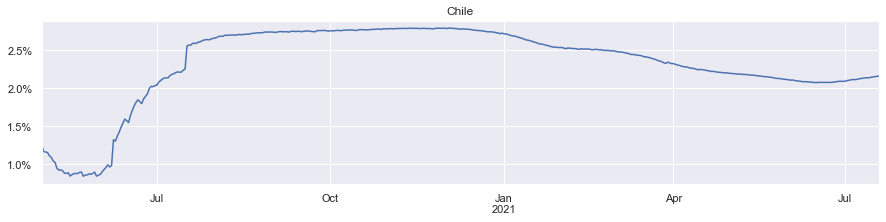

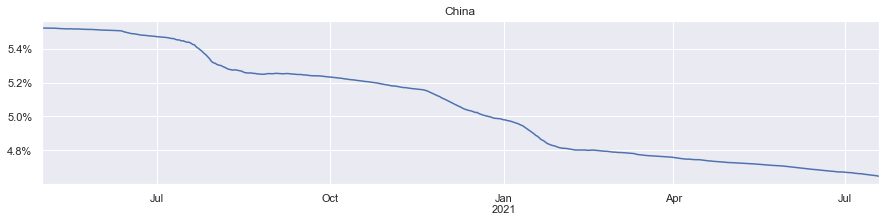

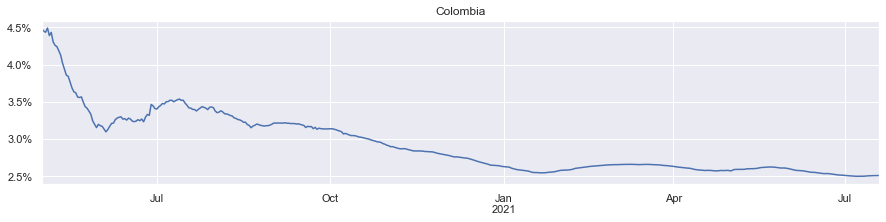

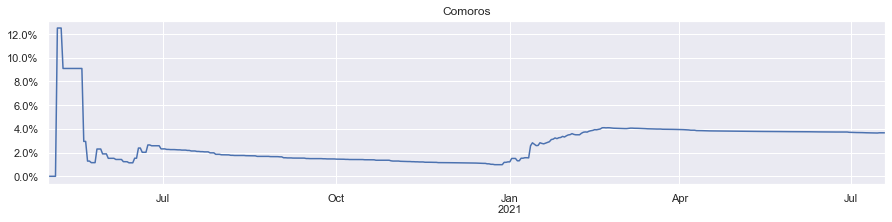

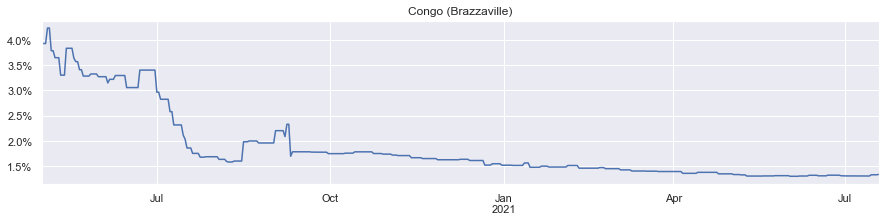

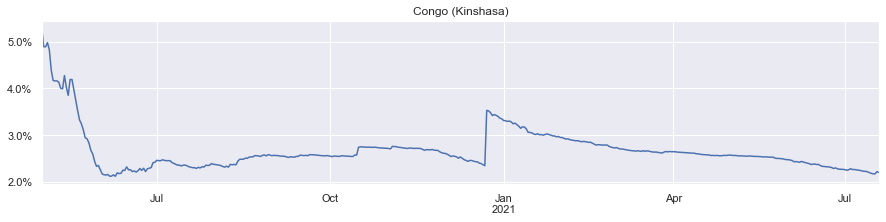

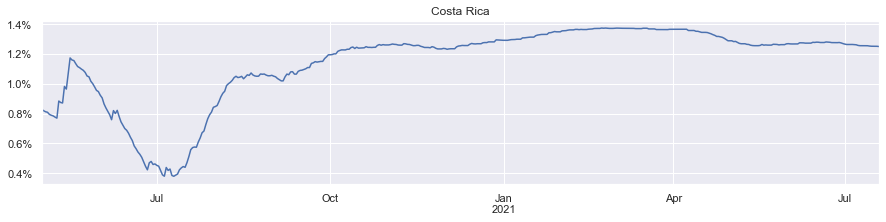

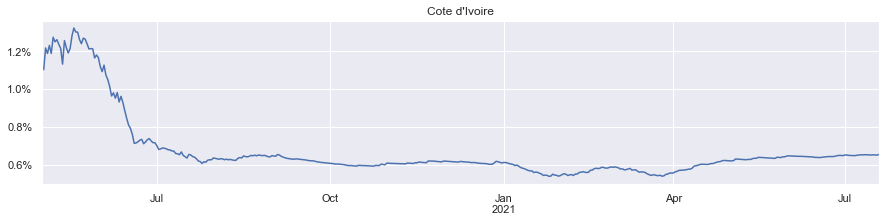

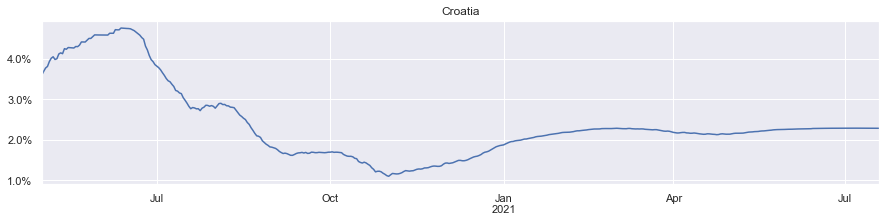

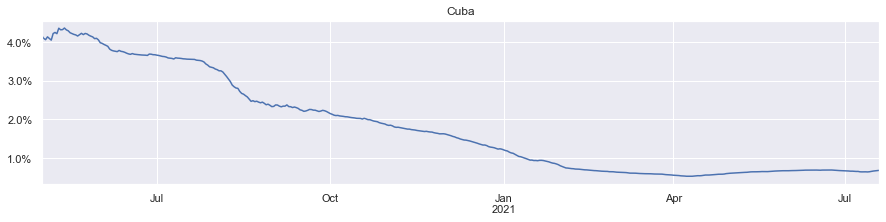

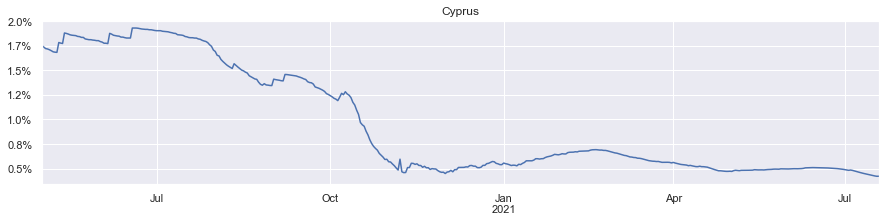

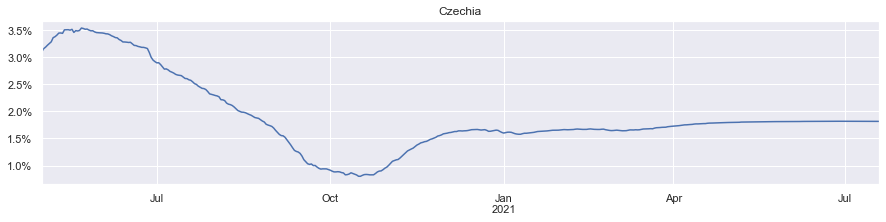

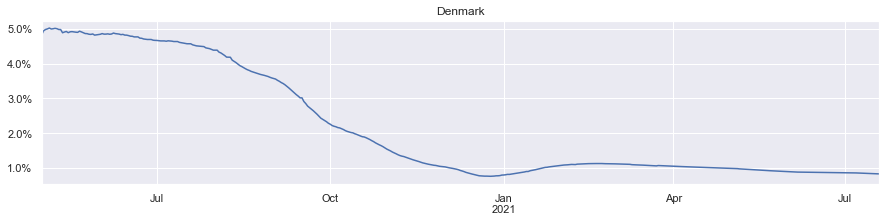

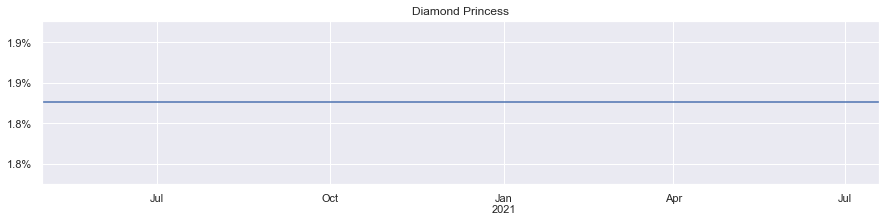

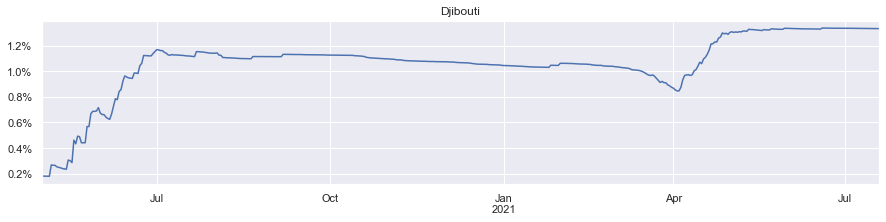

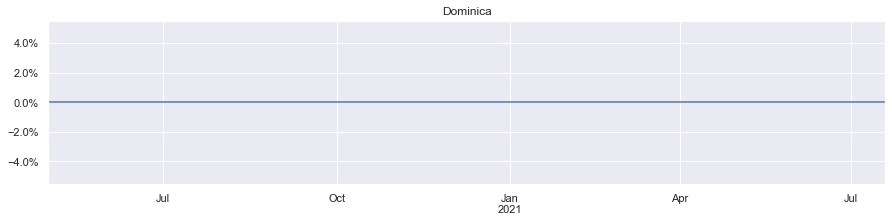

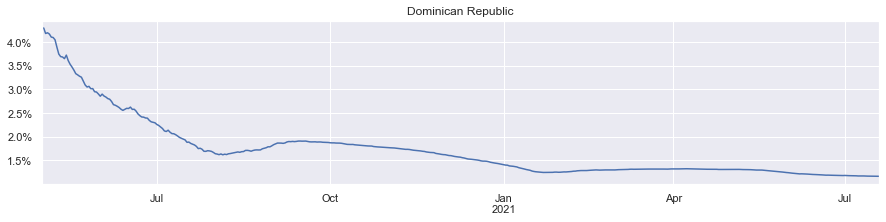

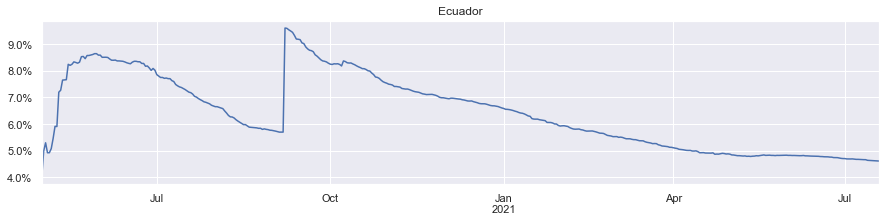

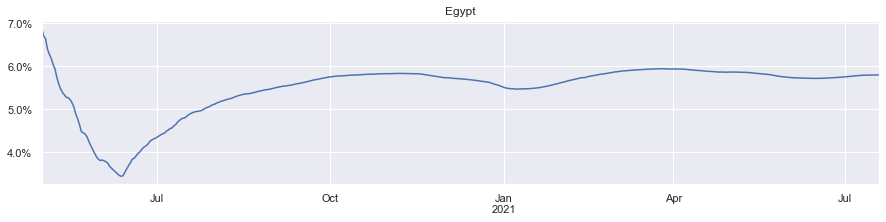

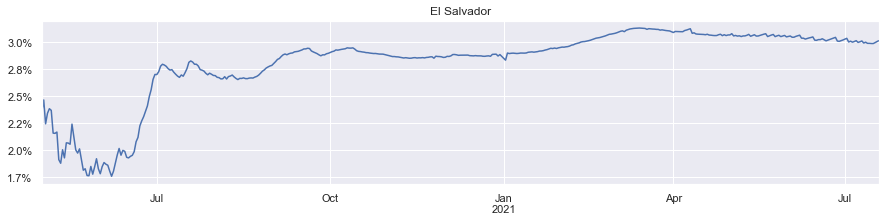

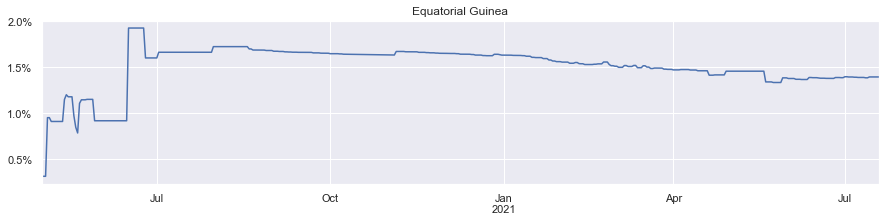

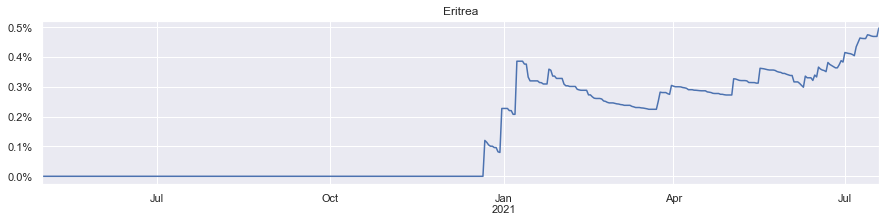

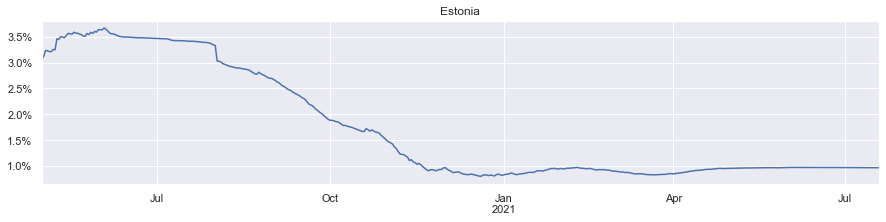

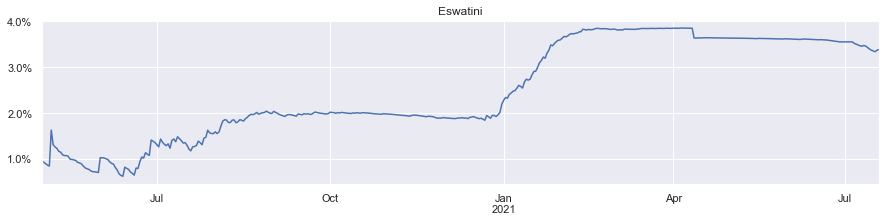

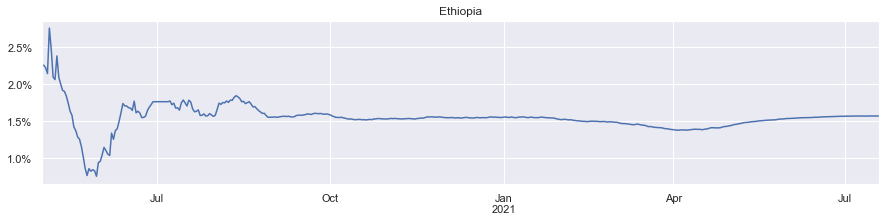

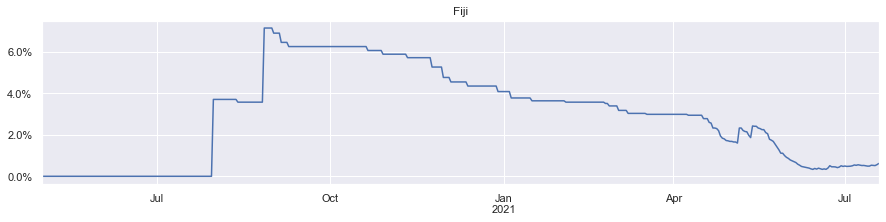

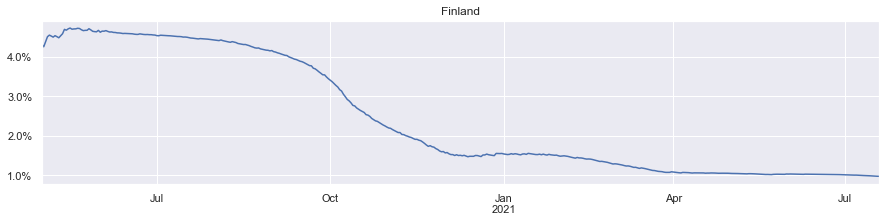

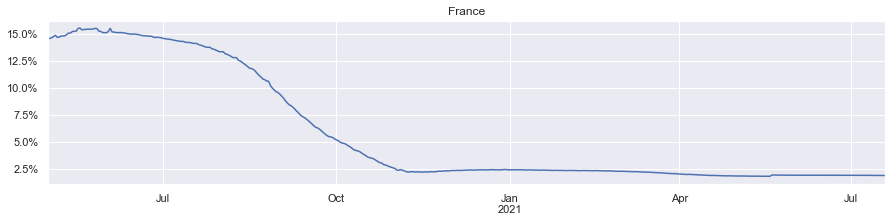

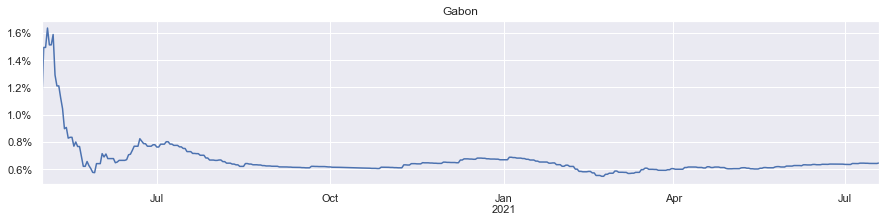

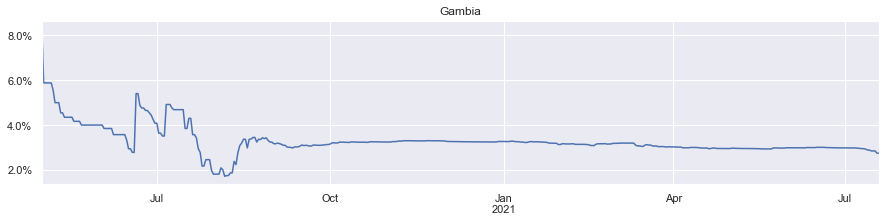

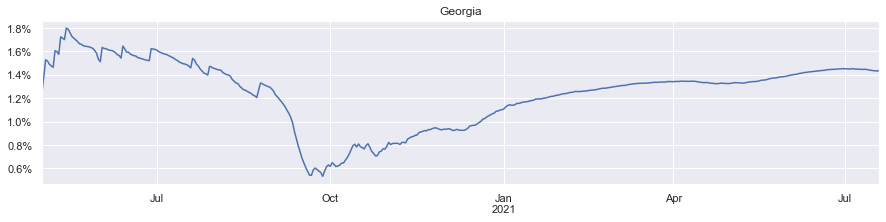

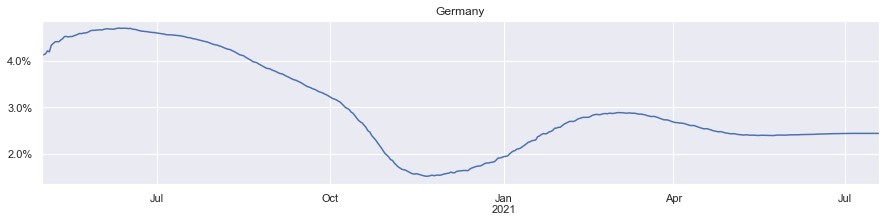

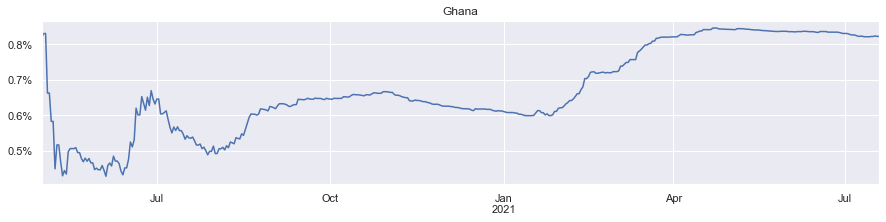

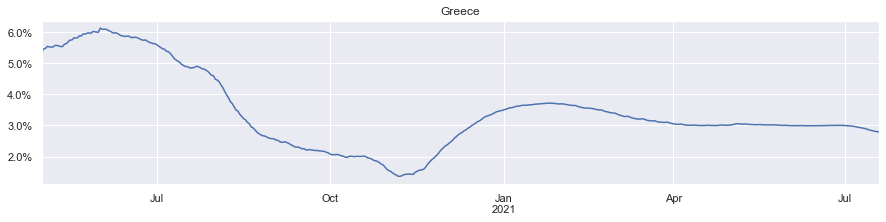

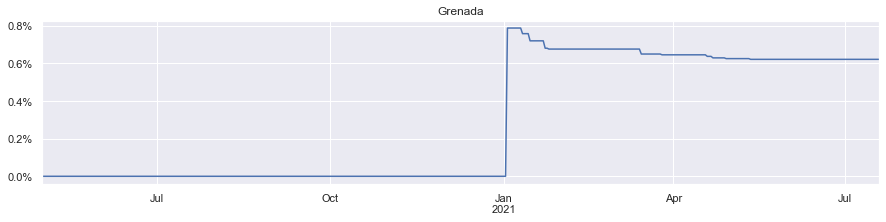

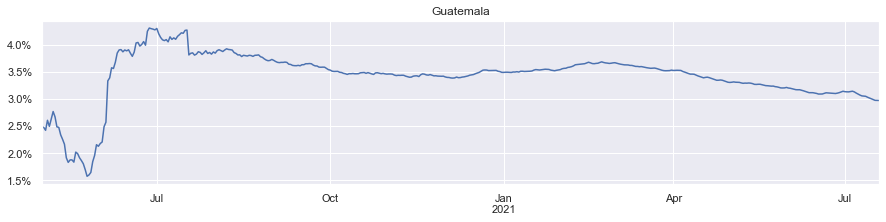

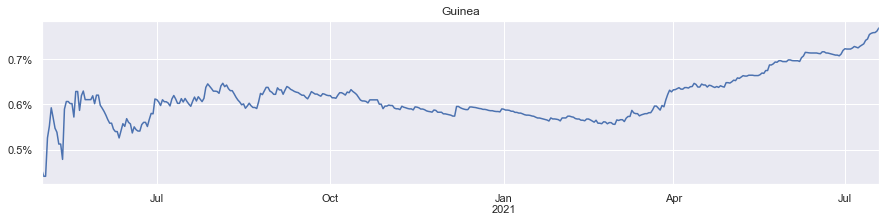

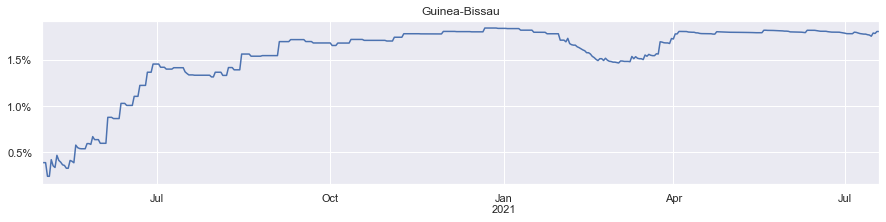

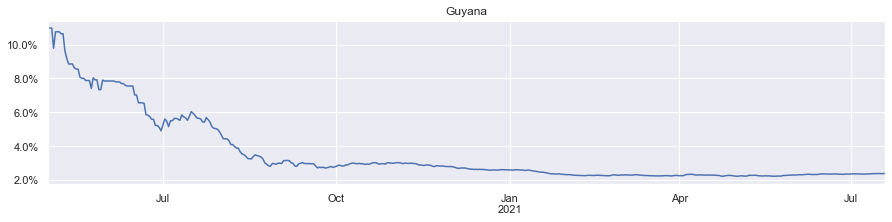

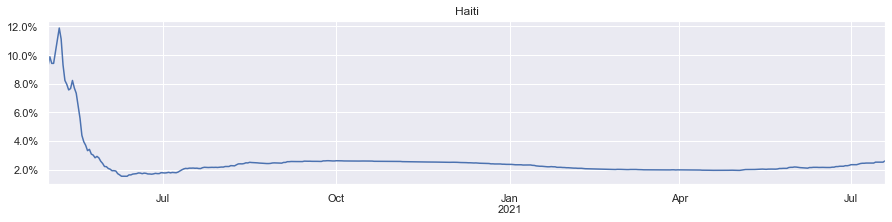

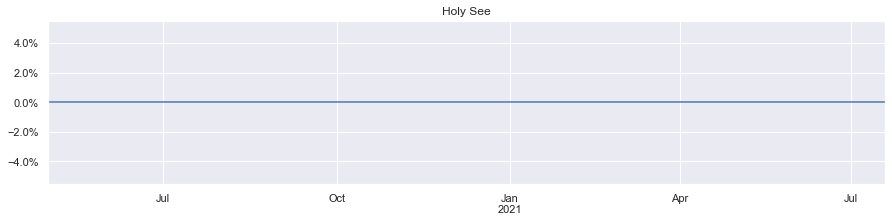

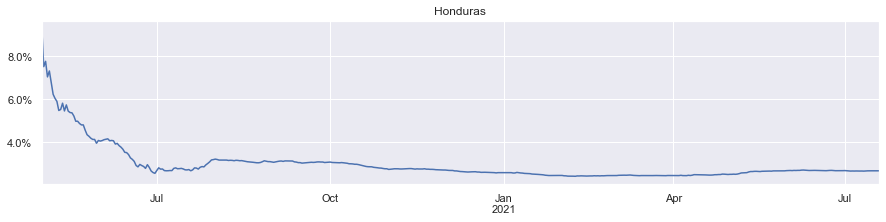

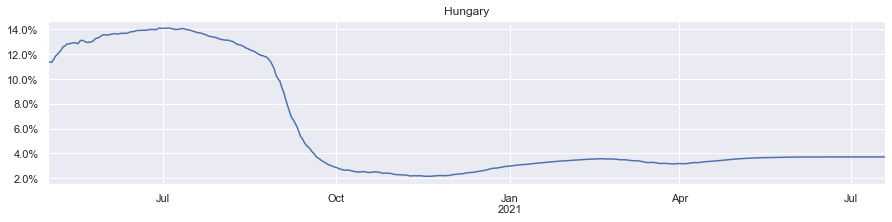

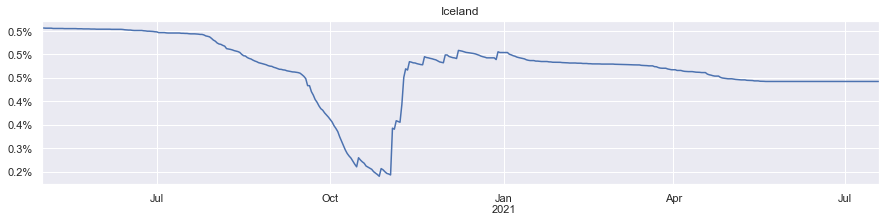

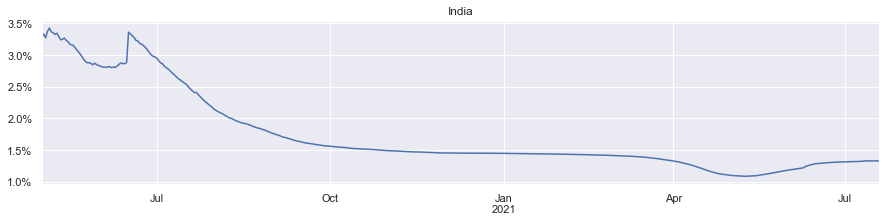

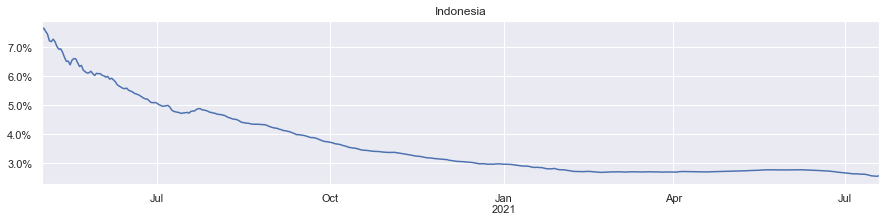

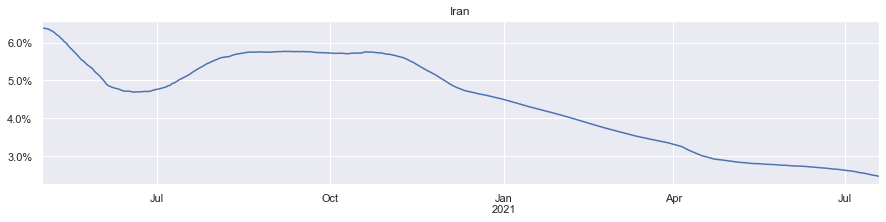

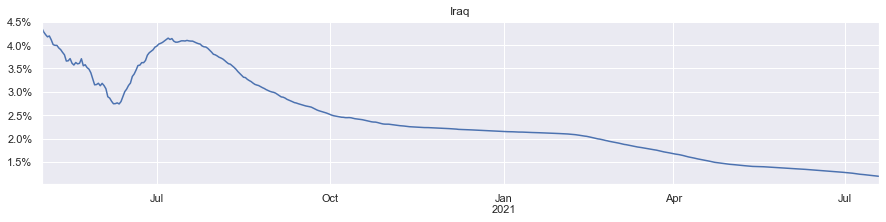

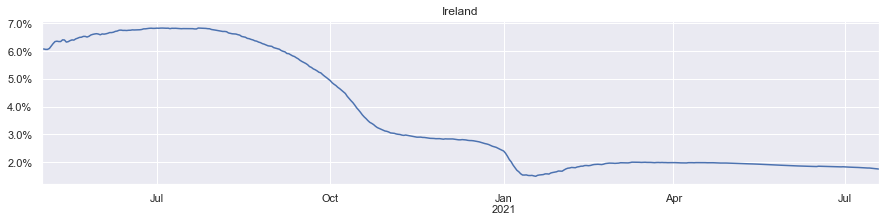

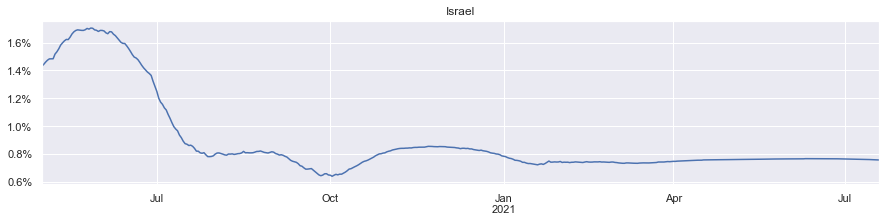

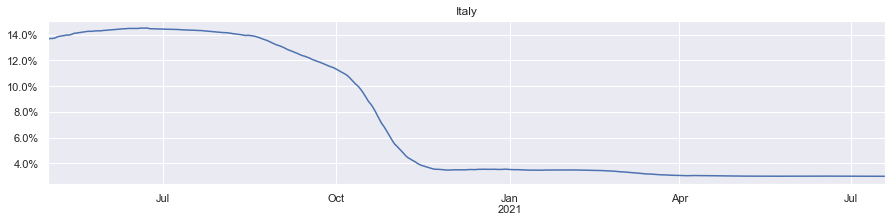

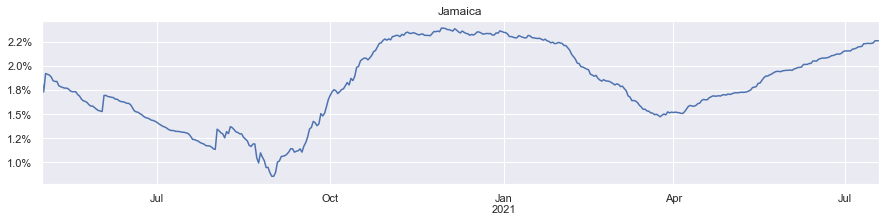

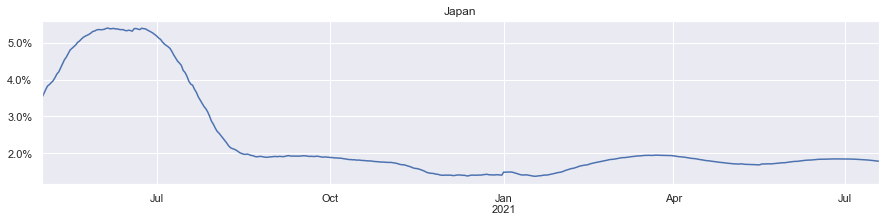

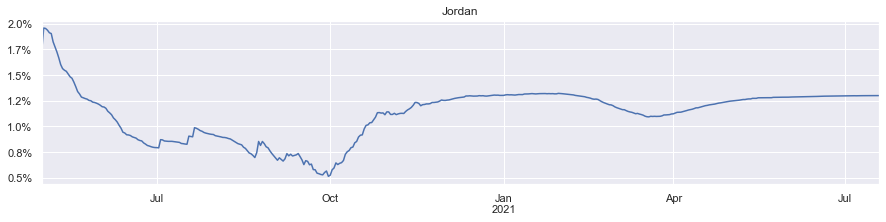

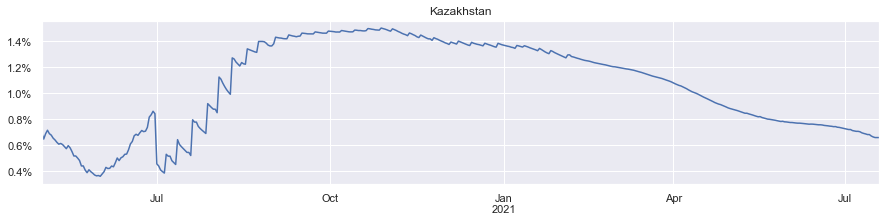

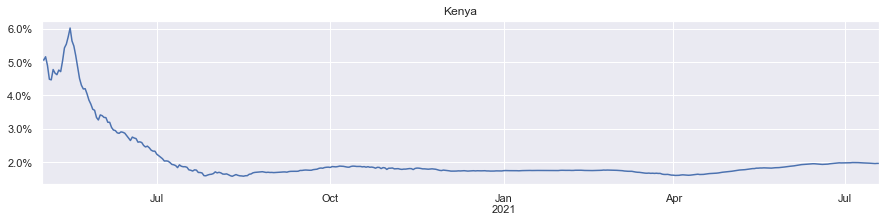

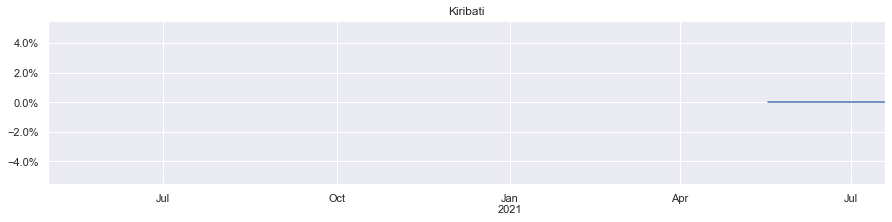

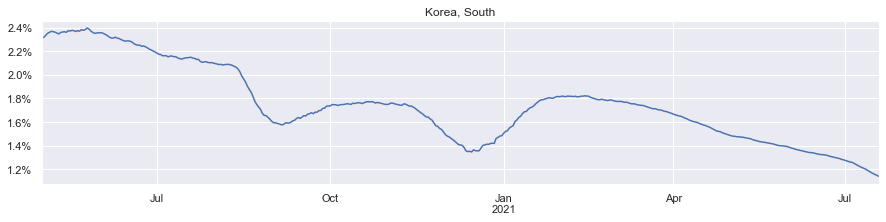

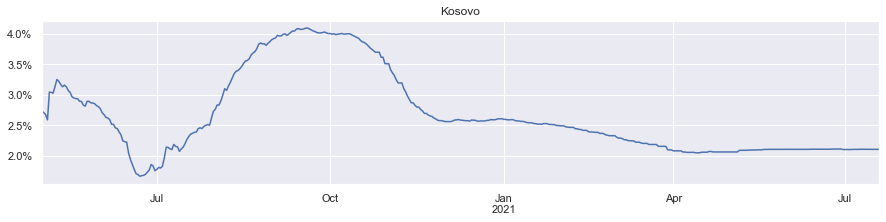

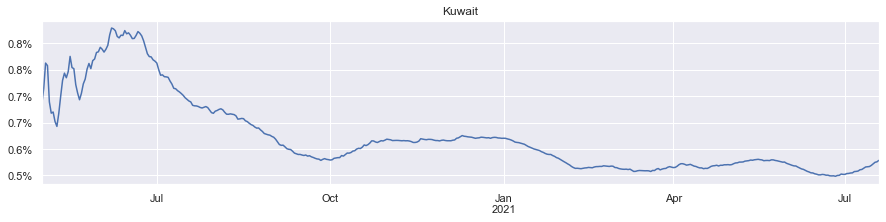

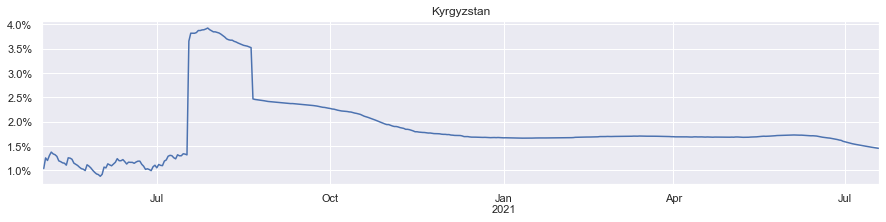

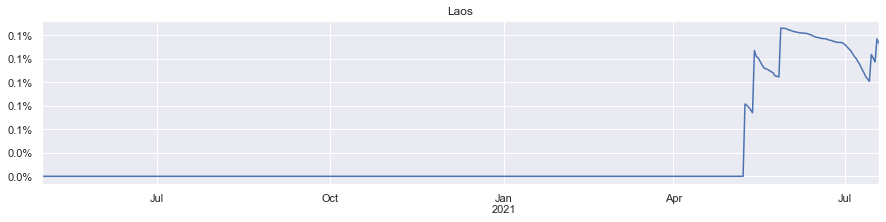

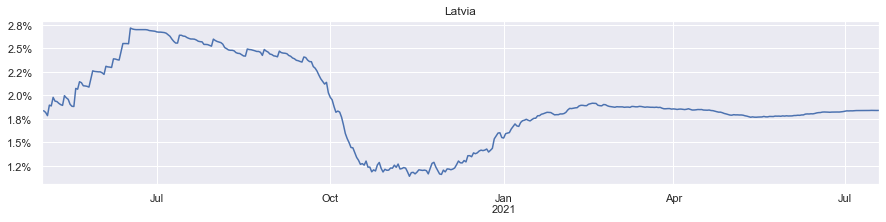

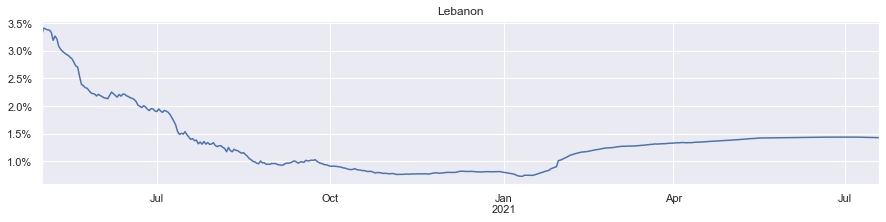

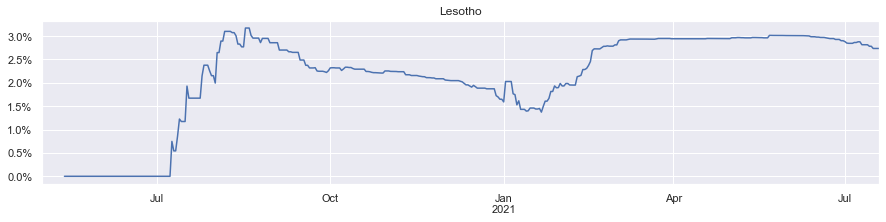

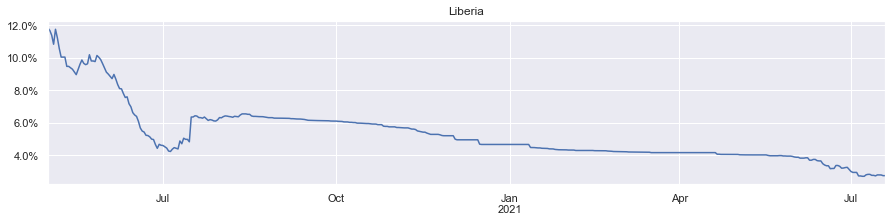

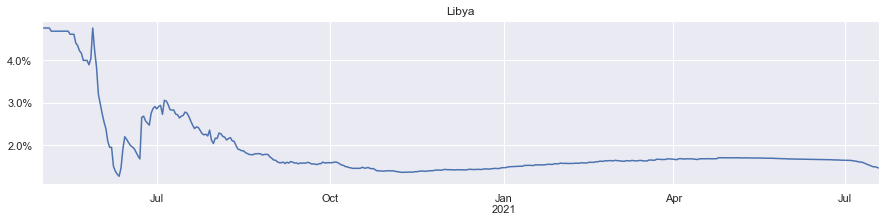

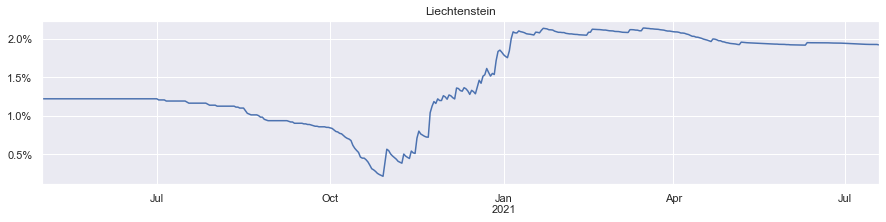

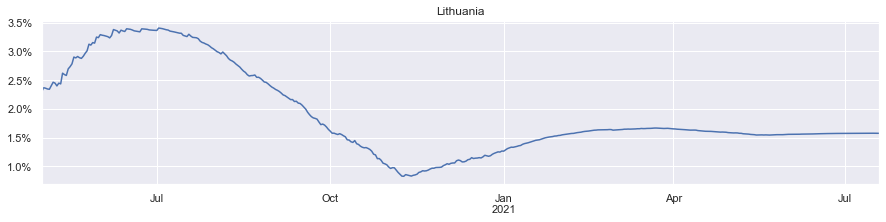

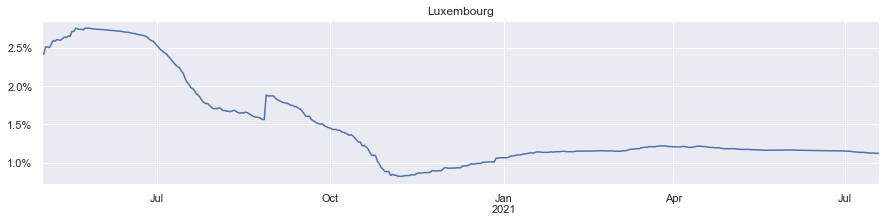

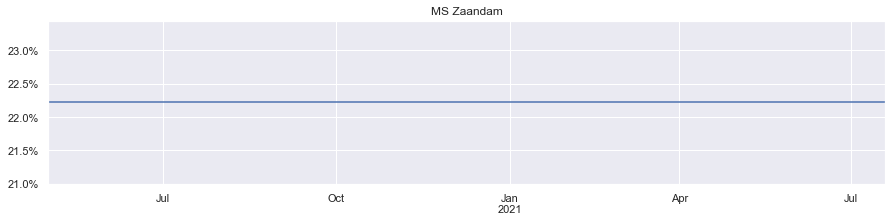

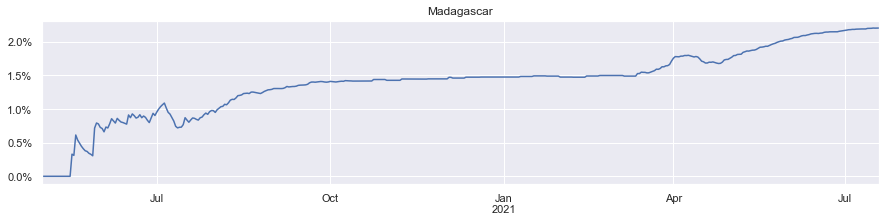

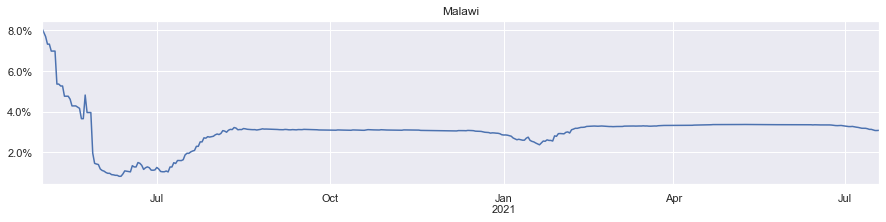

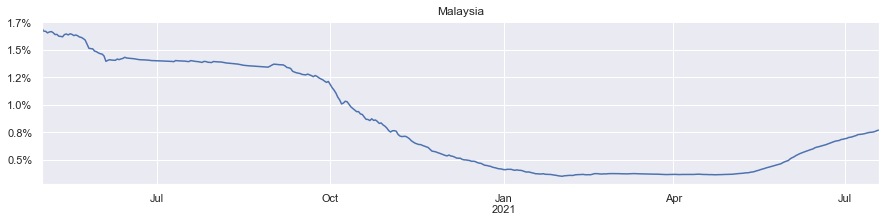

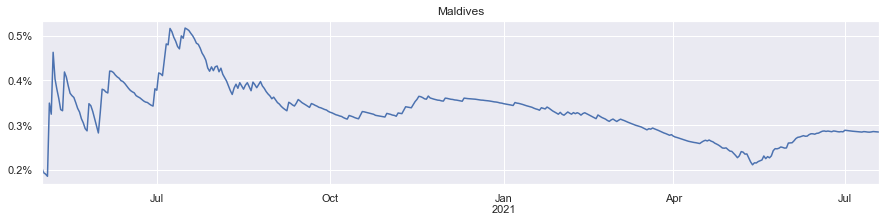

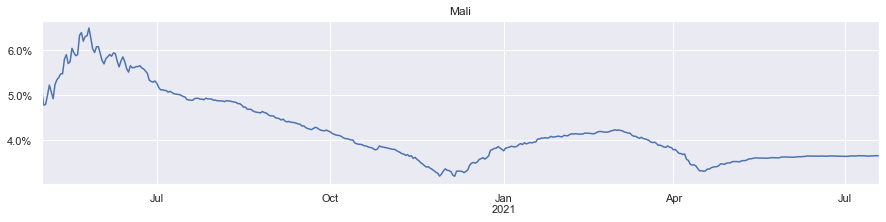

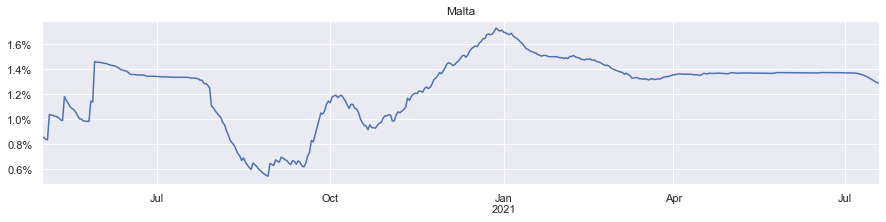

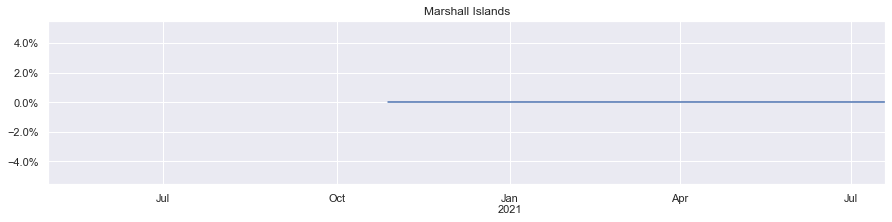

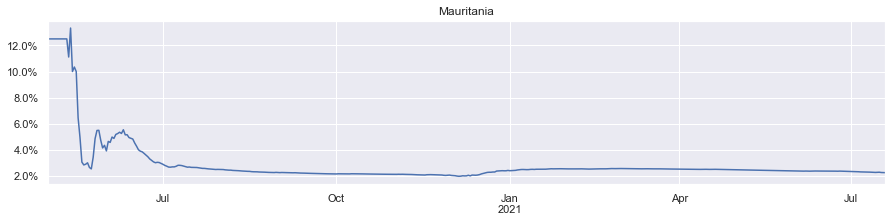

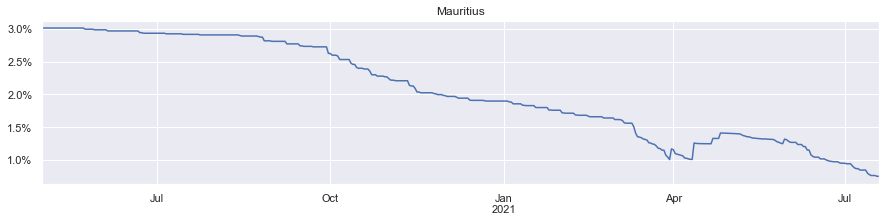

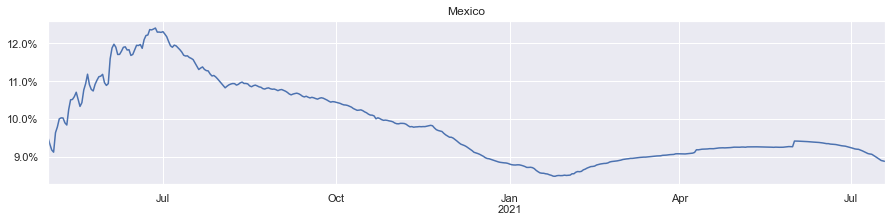

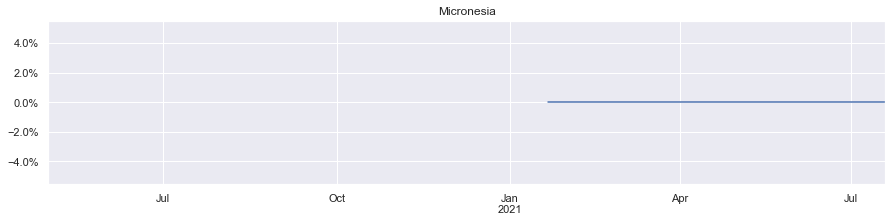

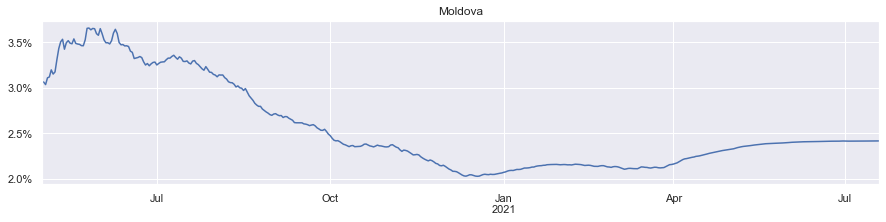

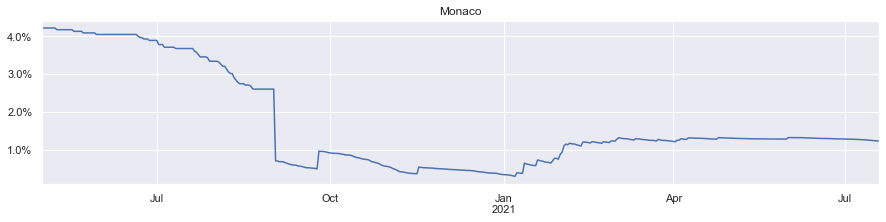

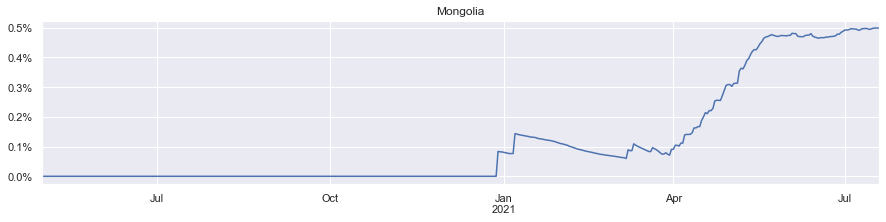

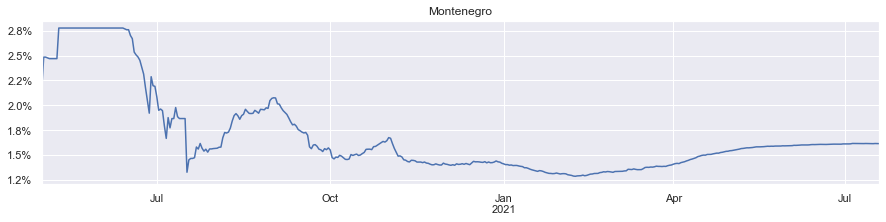

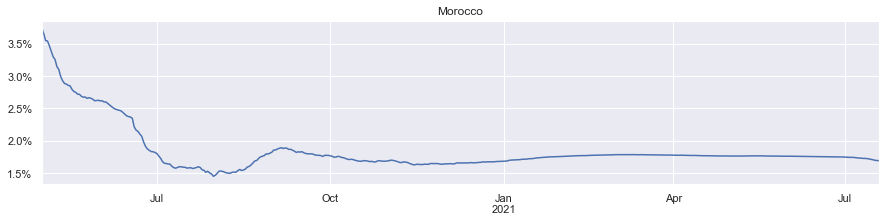

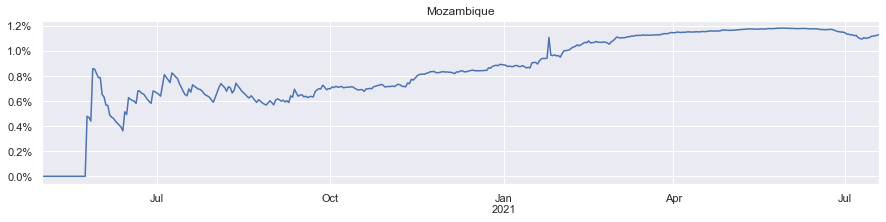

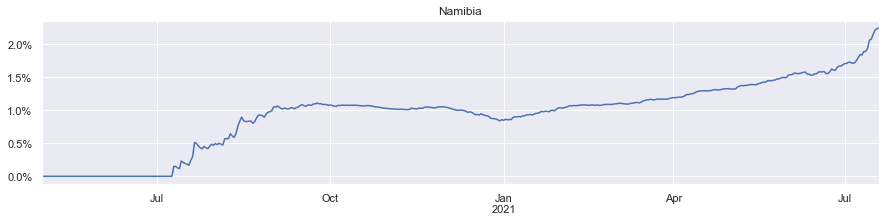

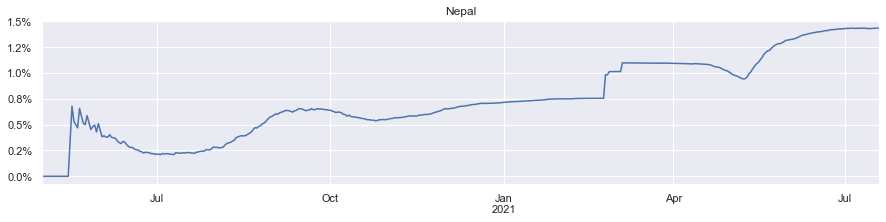

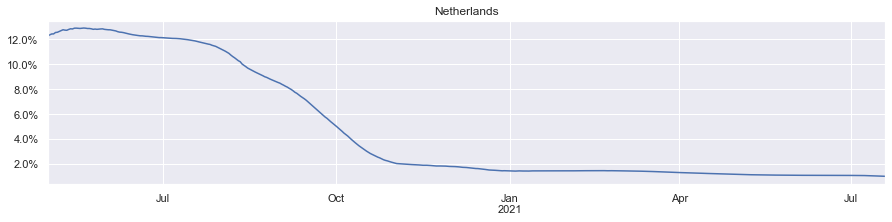

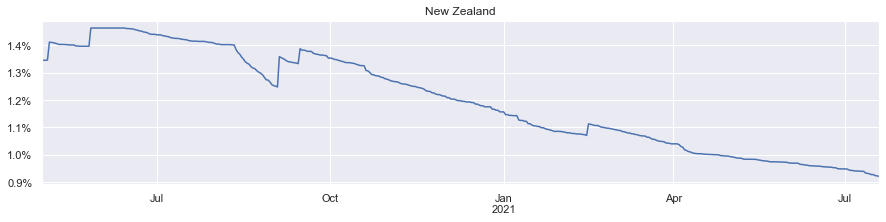

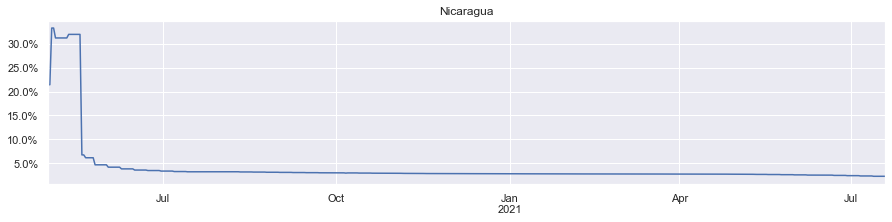

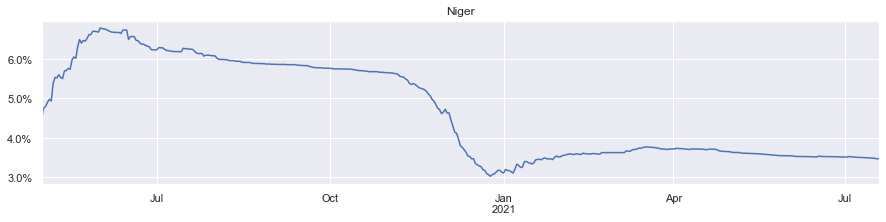

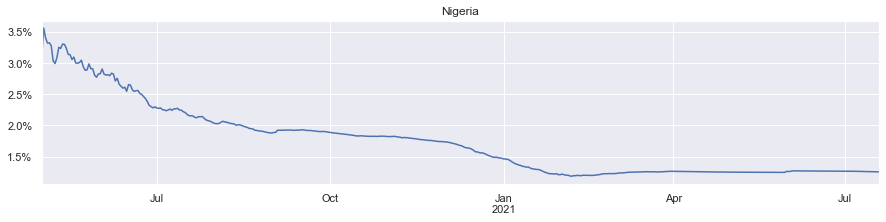

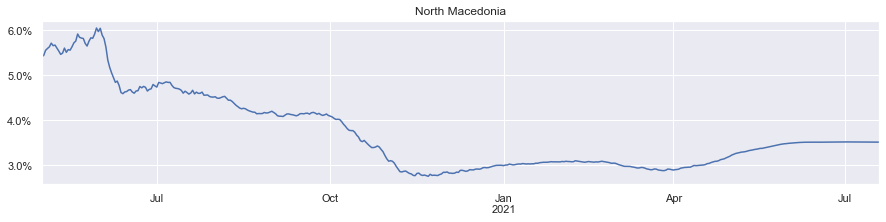

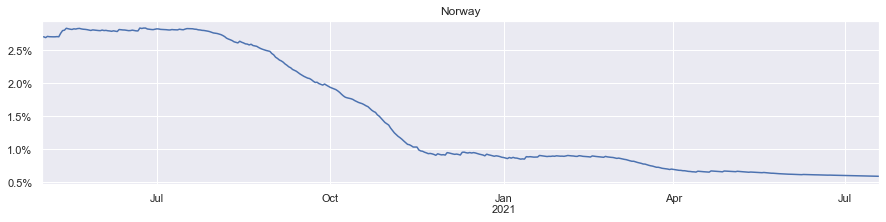

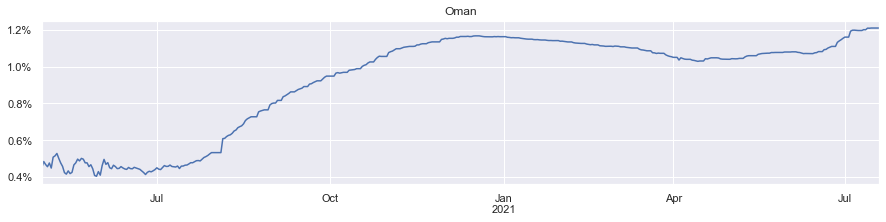

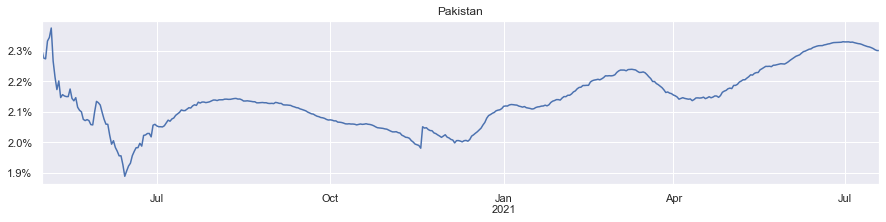

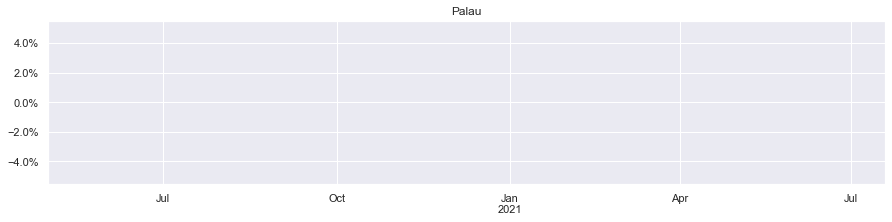

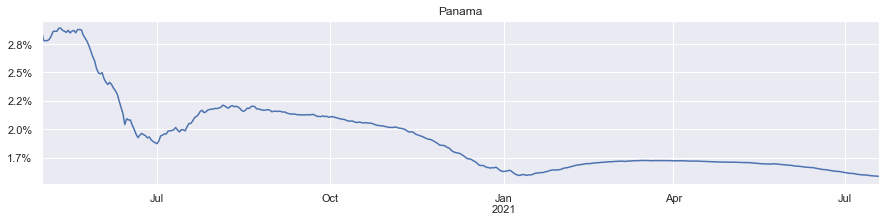

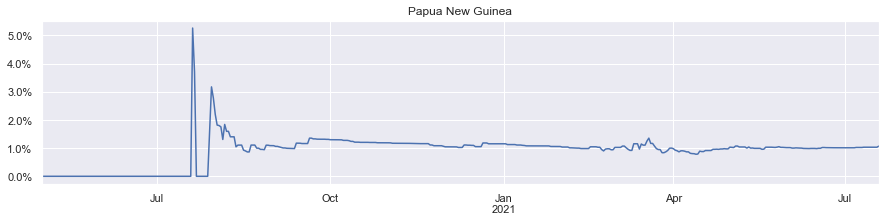

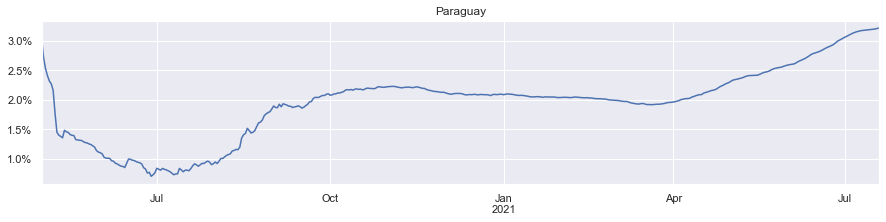

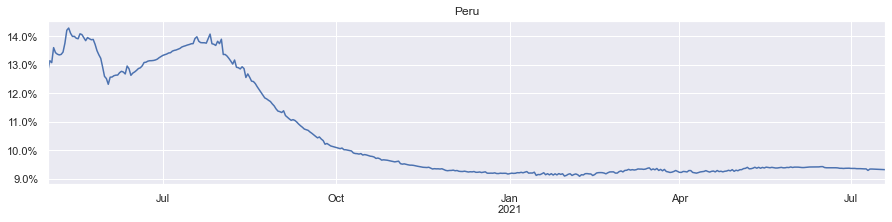

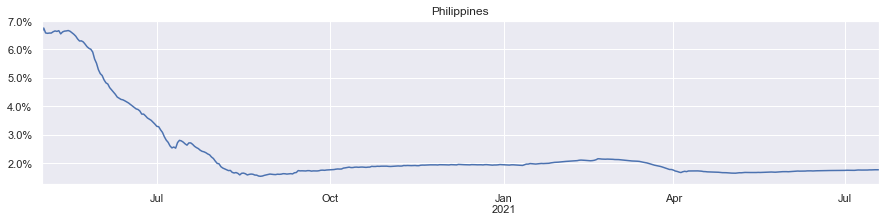

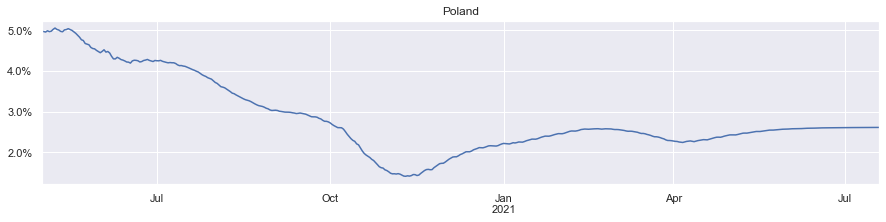

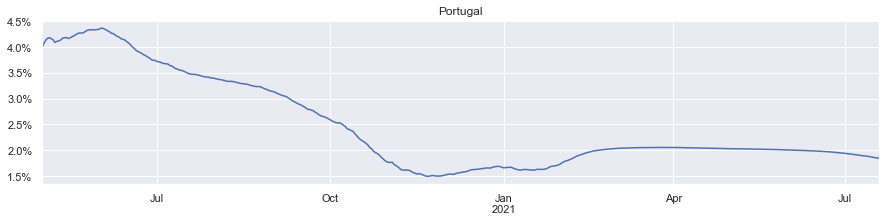

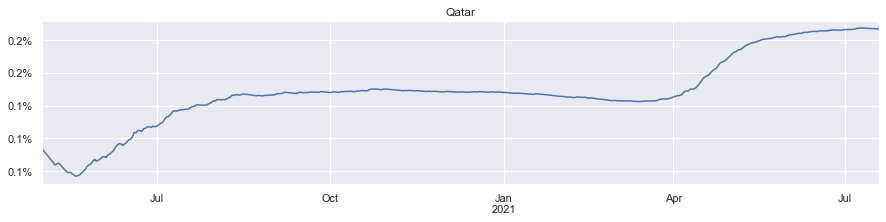

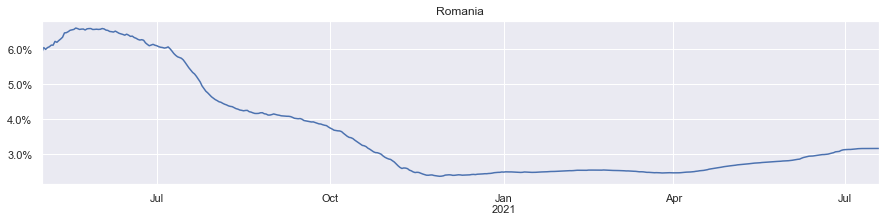

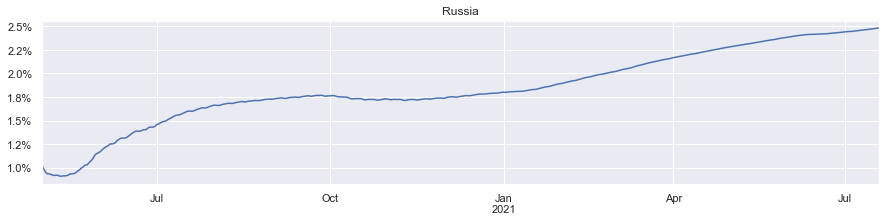

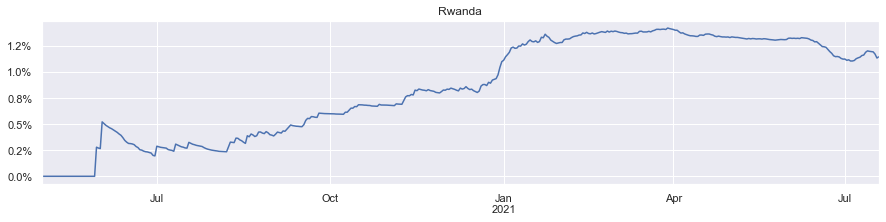

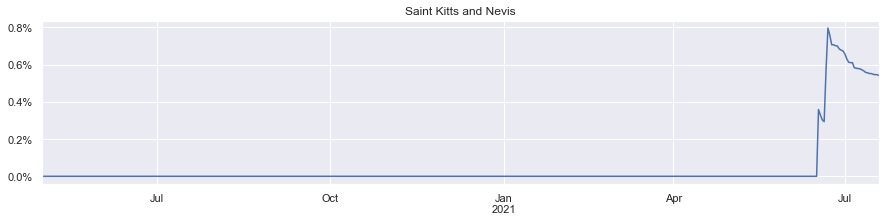

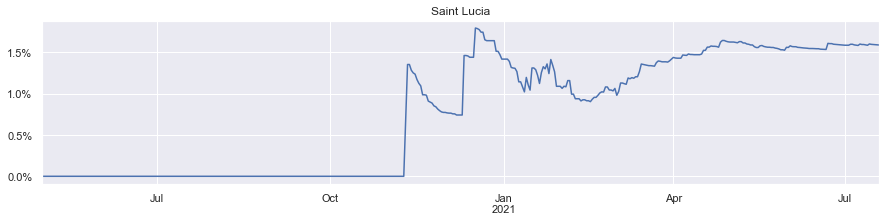

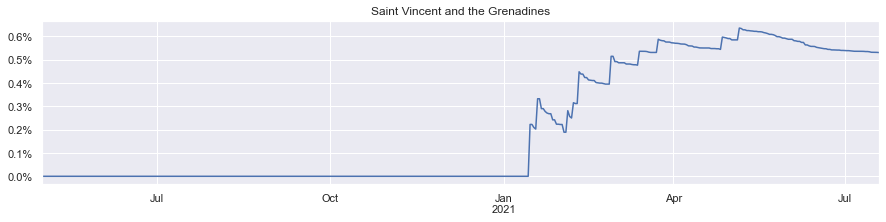

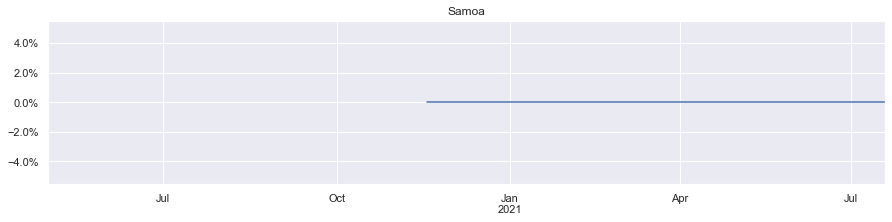

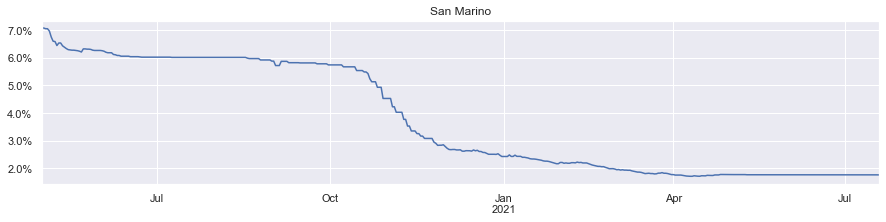

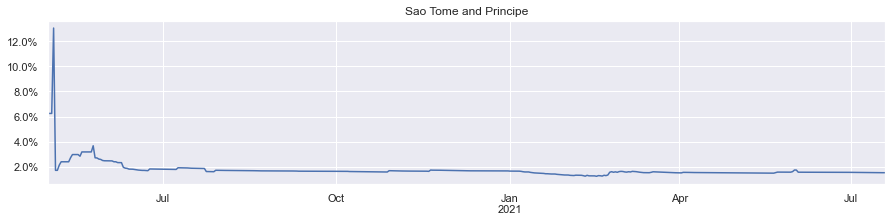

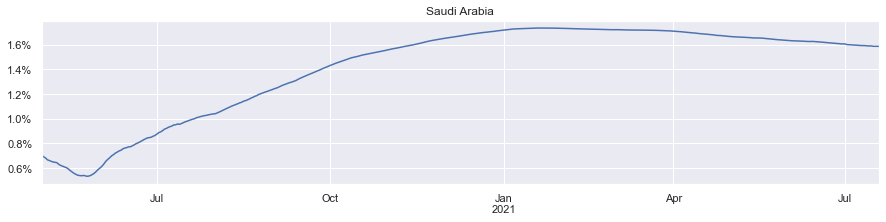

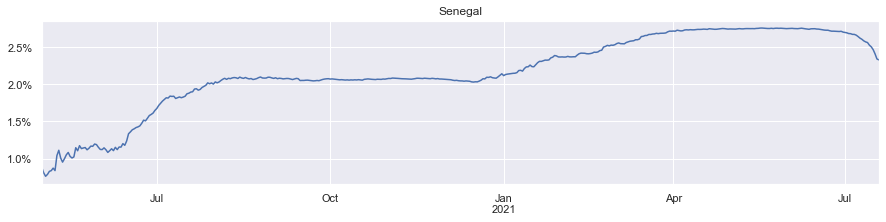

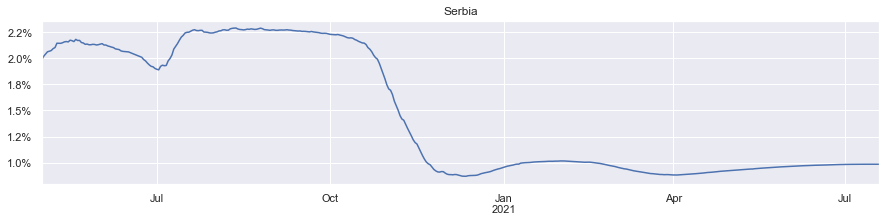

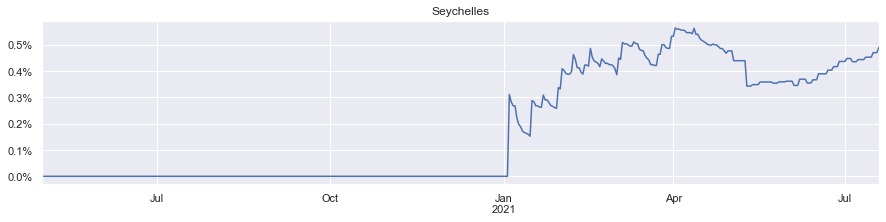

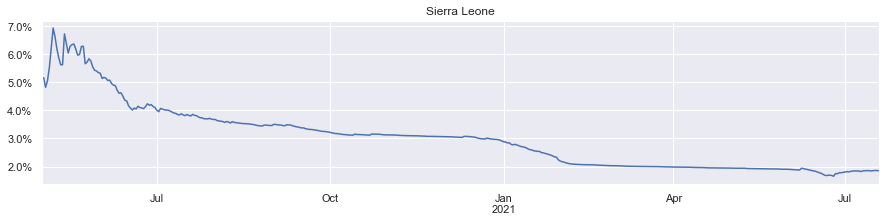

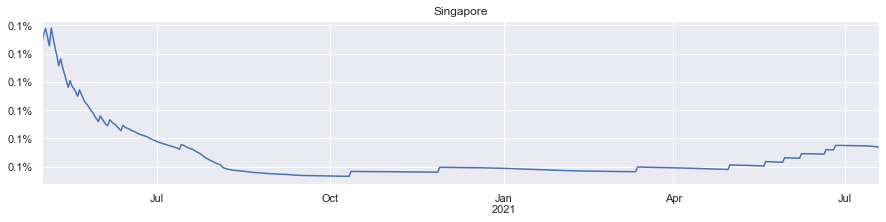

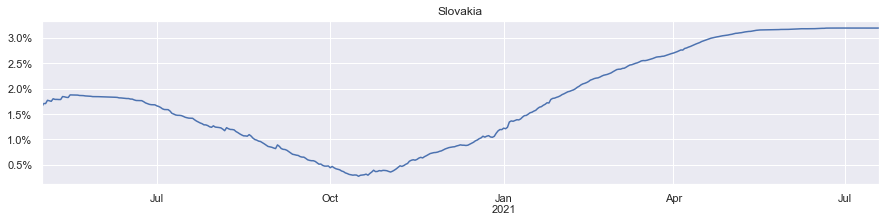

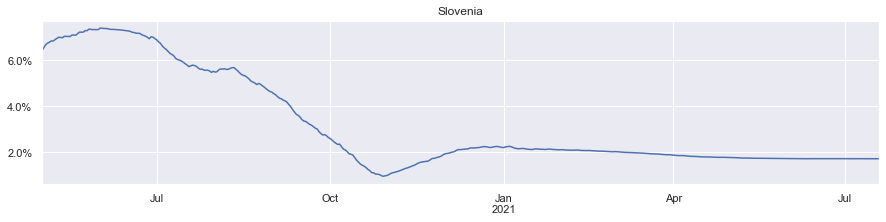

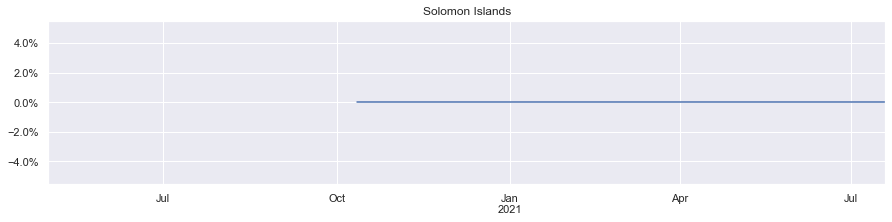

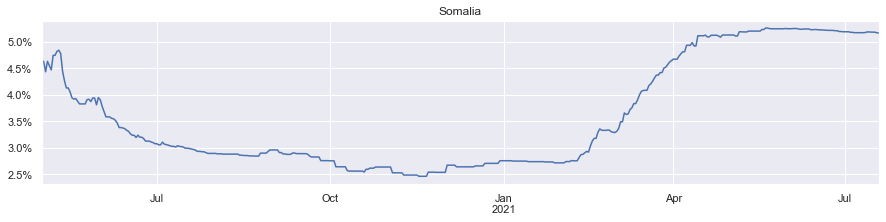

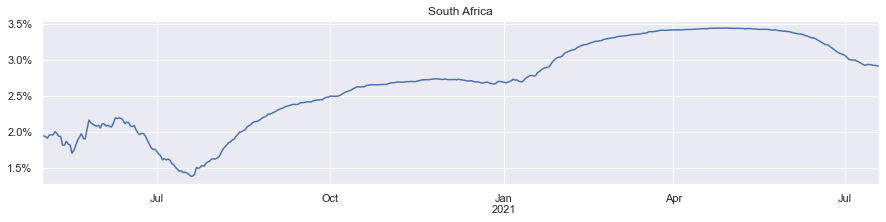

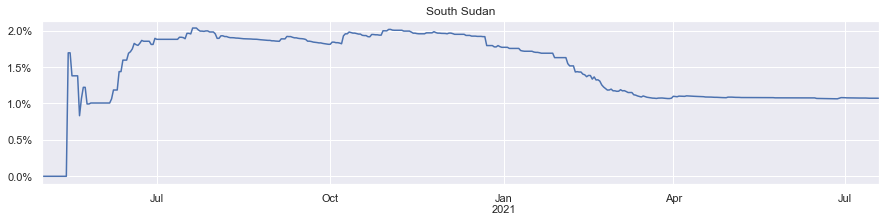

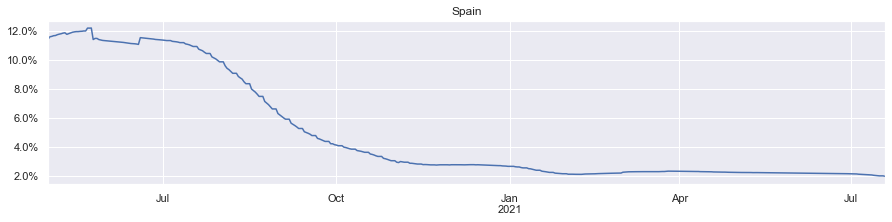

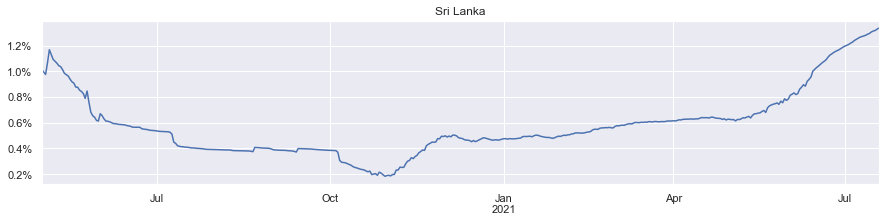

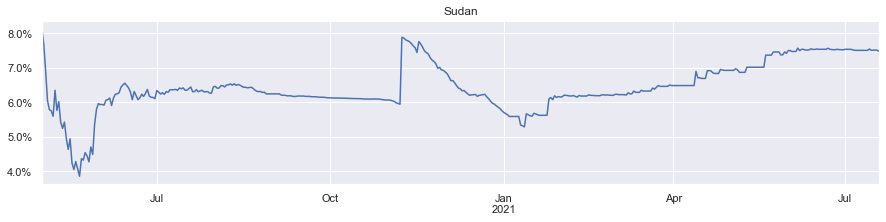

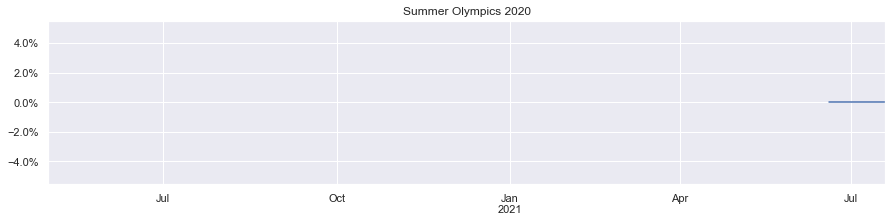

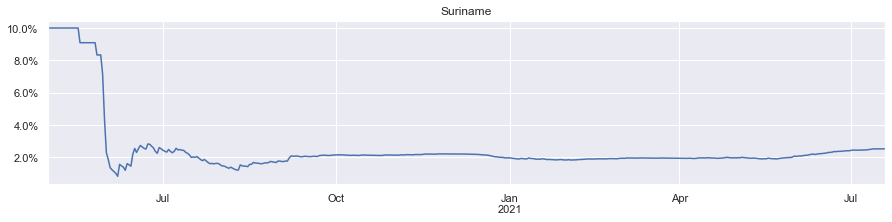

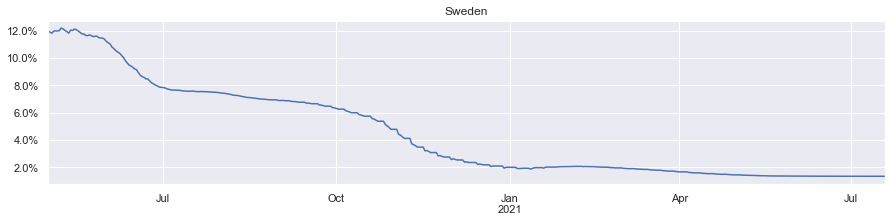

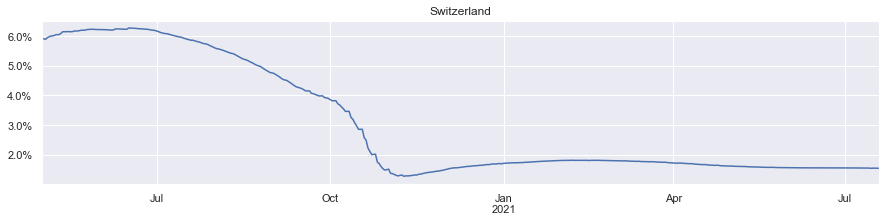

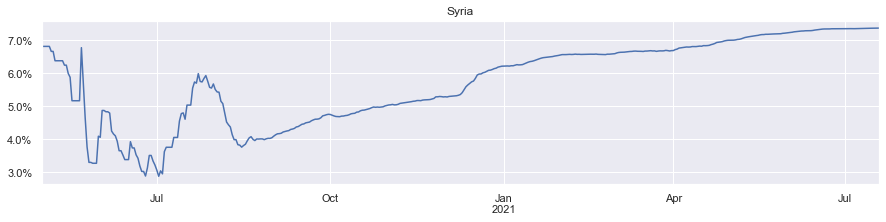

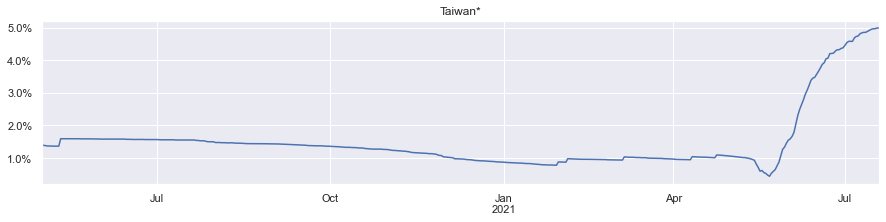

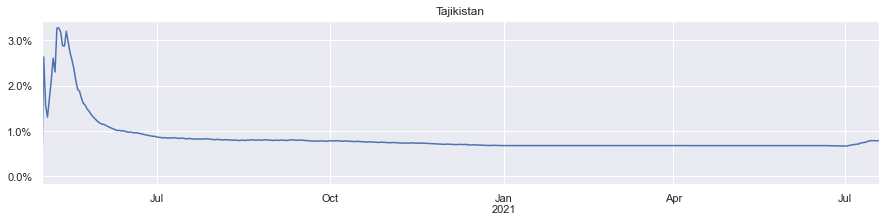

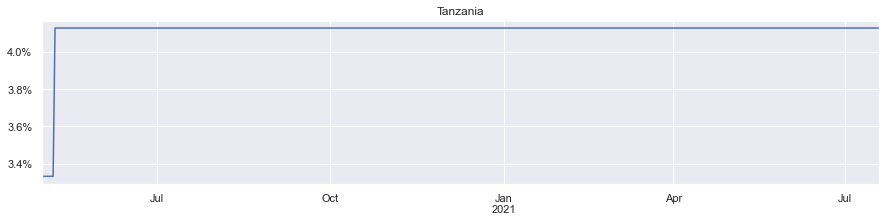

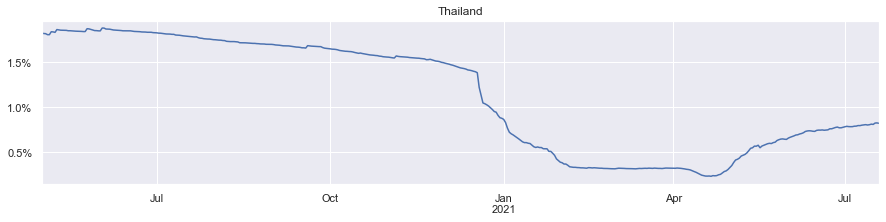

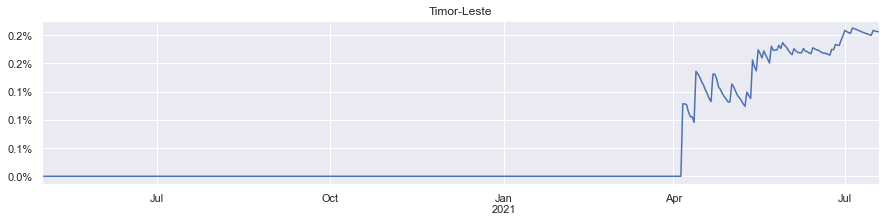

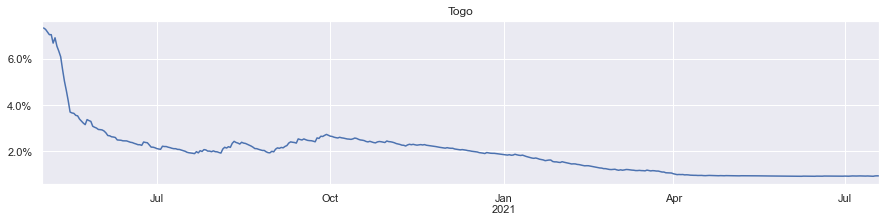

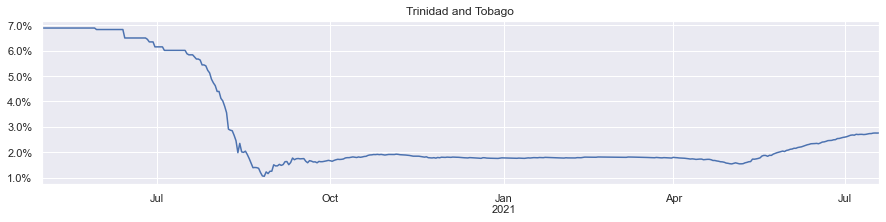

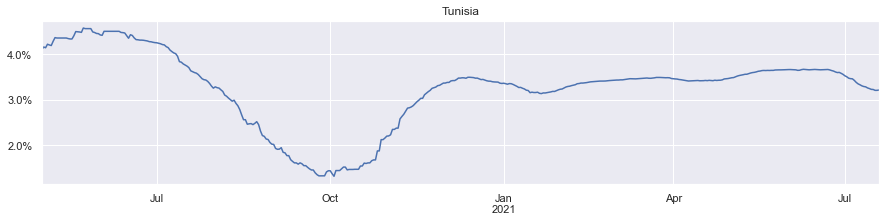

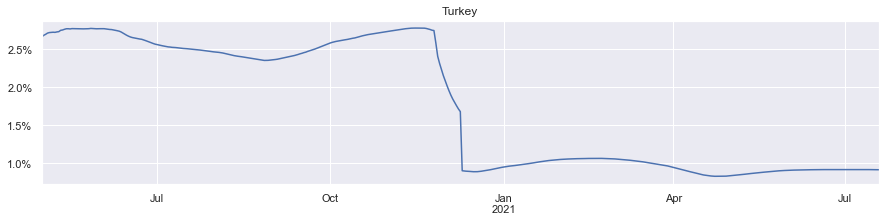

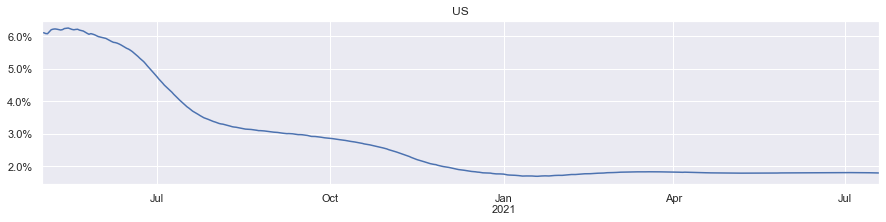

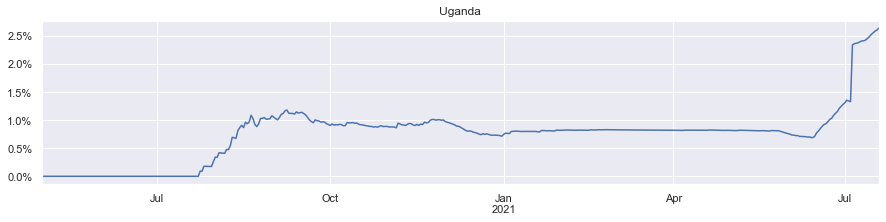

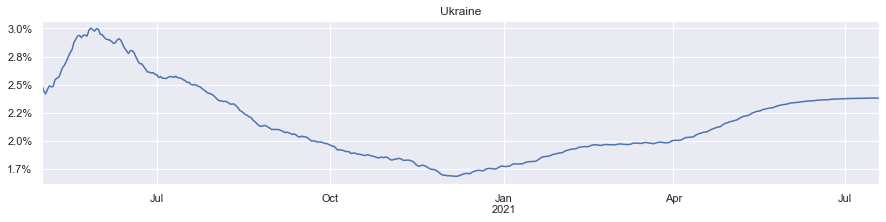

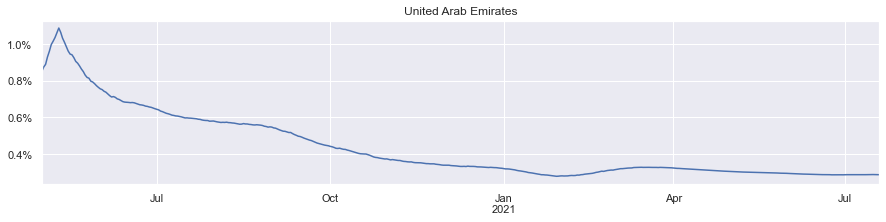

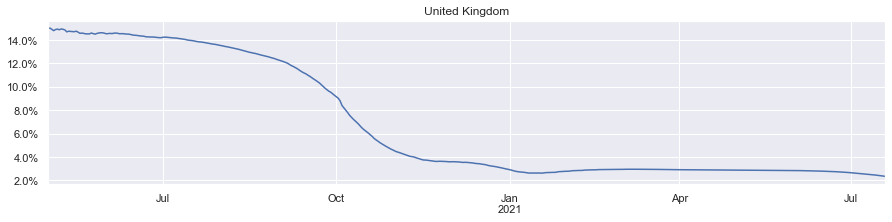

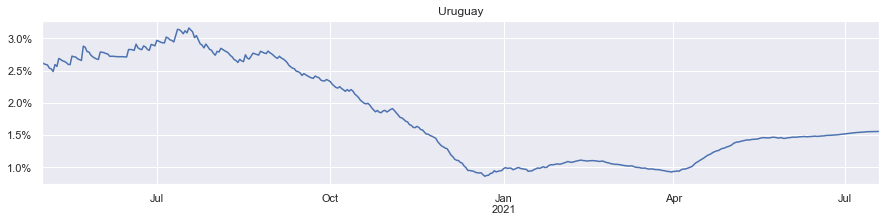

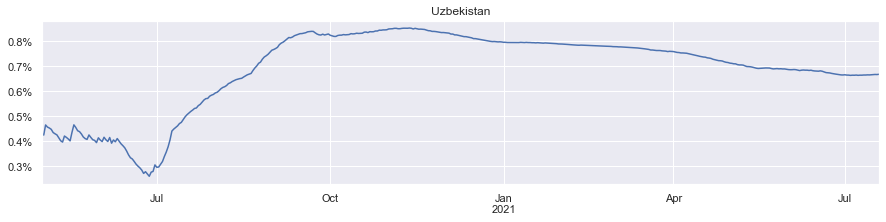

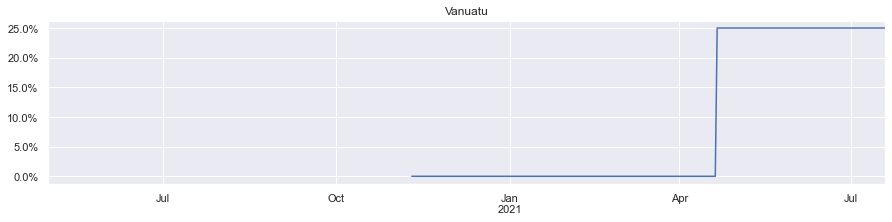

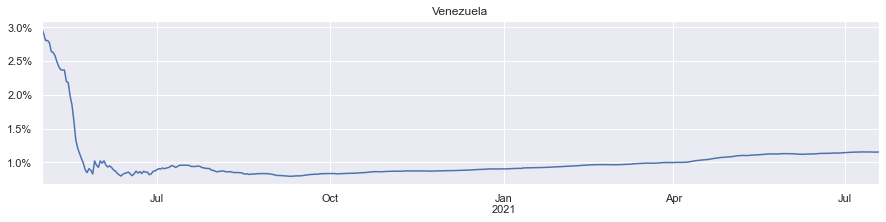

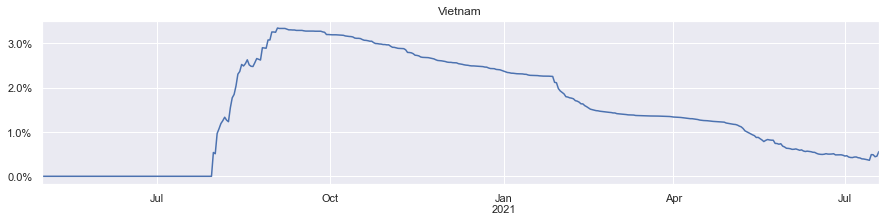

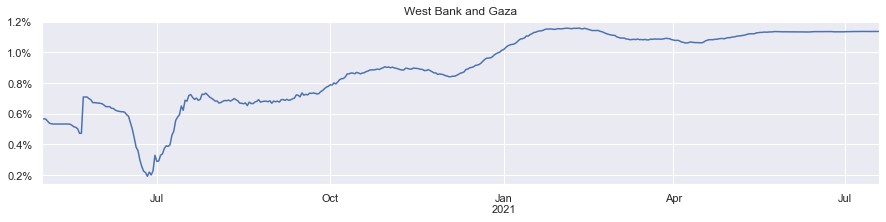

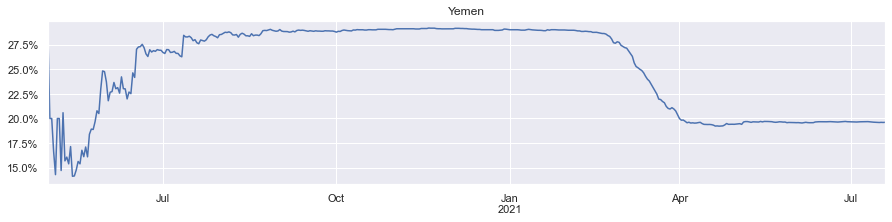

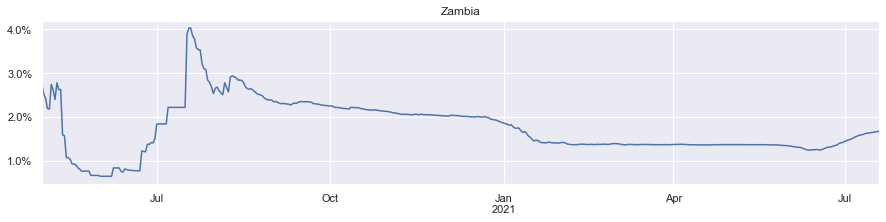

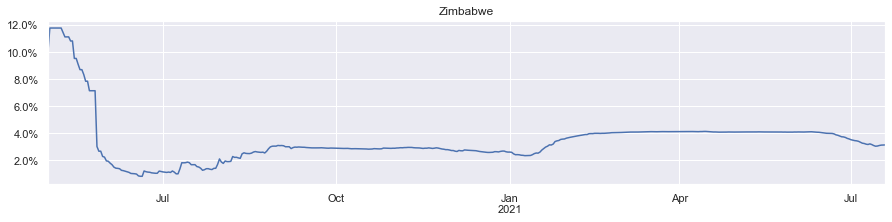

In [126]:
for country in IFR.columns:
    ax = IFR[country].plot(title=country, figsize=(15, 3))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
    plt.show()